# EDA Project (TovTech) - Video Game reviews
### by Roman Fesunenko

In last decades, video games became part of life for most people, especially younger generations. Many companies are providing video games with various devices include PC, game console and mobile device. Also, they are provide games with different genres and with age category. In addition, You can play with different play modes, you can play singleplayer with playing alone and you can play in multiplayer with playing with another players around the world. Video games also advices various type of gameplays, but it not always correspond quality of gameplay and how many time takes to finish completely the game. No less important know that ratings that given by reviewers that have experience with playing game and how video games is so popular.

If you want to play the game for yourself or with others, you need examine which game most popular, which genre are you like, how many hour you will spend in playing, if price is suitable quality and etc. Review ratings and popularity of games can help with some point with choosing good video game.

Good question, let's ask and answer next questions.

- How do user ratings correlate with factors like popularity or completion time?
- Are there any significant differences in user ratings for games released on different genres per year?
- How does the sentiment of user reviews during reviews of the games?

## Data Importing

Importing datasets.

Dataset of "Popular Video Games 1980 - 2023 🎮" by Randomarnab: https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023

- 'Title' - Title of the game.
- 'Release Date' - Release date.
- 'Team' - Game developer team.
- 'Rating' - Average rating.
- 'Times Listed' - Number of users who listed this game.
- 'Number of Reviews' - Number of reviews received from the users.
- 'Genres' - All genres pertaining to a specified game.
- 'Summary' - Summary provided by the team.
- 'Reviews' - User reviews.
- 'Plays' - Number of users that have played the game before.
- 'Playing' - Number of current users who are playing the game.
- 'Backlogs' - Number of users who have access but haven't started with the game yet.
- 'Wishlist' - Number of users who wish to play the game.

### Import the packages

In [1]:
# Import revelant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ast
from textblob import TextBlob

!pip install twython

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

warnings.filterwarnings('ignore', category=FutureWarning)

### Load the data from dataset

In [2]:
# Import all_video_games(cleaned).csv dataset from /kaggle/input/video-game-reviews-and-ratings
url = '/kaggle/input/popular-video-games-1980-2023/games.csv'
games = pd.read_csv(url)

### Display first rows of data

In [3]:
# Display first rows of data
games.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


## Data Cleaning and Preprocessing

### Display information about data

In [4]:
# Rename a index column
games = games.rename(columns={'Unnamed: 0': 'Game ID'})

# Display info about data
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Game ID            1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


**At result:**

*There multiple types of data columns in games data:*

* Types of objects - 'Title', 'Release Date', 'Team', 'Times Listed', 'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing', 'Backlogs' and 'Wishlist'

* Types of number (float64 and int64) - 'Game ID' (in past this column named as "Unnamed: 0", 'Rating'

### Change release year column to datetime type

In [5]:
# Changing column type "Release Date" to datetime type
games['Release Date'] = pd.to_datetime(games['Release Date'], errors='coerce')

# Display Release Date unique values
print(f"Release Dates unique: {games['Release Date'].unique()}\n")

# Display data info
print(games.info())

# Display first data columns
games.head()

Release Dates unique: <DatetimeArray>
['2022-02-25 00:00:00', '2019-12-10 00:00:00', '2017-03-03 00:00:00',
 '2015-09-15 00:00:00', '2017-02-24 00:00:00', '2011-11-18 00:00:00',
 '2020-12-25 00:00:00', '2021-10-07 00:00:00', '2018-06-15 00:00:00',
 '2017-02-23 00:00:00',
 ...
 '2003-09-23 00:00:00', '2011-09-14 00:00:00', '2011-12-14 00:00:00',
 '1999-10-31 00:00:00', '1991-12-31 00:00:00', '2010-12-22 00:00:00',
 '2019-05-21 00:00:00', '2012-05-22 00:00:00', '2020-10-06 00:00:00',
 '2014-02-04 00:00:00']
Length: 987, dtype: datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Game ID            1512 non-null   int64         
 1   Title              1512 non-null   object        
 2   Release Date       1509 non-null   datetime64[ns]
 3   Team               1511 non-null   object        
 4   Rating     

,Game ID,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


**At result:**

Year column changed to datetime type.

### Change number types from 1K to 1,000 (changing type to int type to Times Listed, Number of Reviews, Plays, Playing, Backlogs, Wishlist columns)

In [6]:
# Function to convert '3.9K' to '3900'
def convert_to_number(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '')) * 1_000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
    return value

# Apply the function to the relevant columns
columns_to_convert = ['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']
for column in columns_to_convert:
    games[column] = games[column].apply(convert_to_number)

# Convert to integers for better readability
games[columns_to_convert] = games[columns_to_convert].astype(int)

# Checking columns types
print(games.info())

# Check the transformed dataset
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Game ID            1512 non-null   int64         
 1   Title              1512 non-null   object        
 2   Release Date       1509 non-null   datetime64[ns]
 3   Team               1511 non-null   object        
 4   Rating             1499 non-null   float64       
 5   Times Listed       1512 non-null   int64         
 6   Number of Reviews  1512 non-null   int64         
 7   Genres             1512 non-null   object        
 8   Summary            1511 non-null   object        
 9   Reviews            1512 non-null   object        
 10  Plays              1512 non-null   int64         
 11  Playing            1512 non-null   int64         
 12  Backlogs           1512 non-null   int64         
 13  Wishlist           1512 non-null   int64         
dtypes: datet

,Game ID,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600
2,2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600
3,3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1800
4,4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3000,3000,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,8300,2300


**At result:**

Number columns changed from 1K to 1,000 numbers and type changed to int64.

### Check the rows and columns of data

In [7]:
print(f"Count of rows: {games.shape[0]} \nCount of columns: {games.shape[1]}")

Count of rows: 1512 
Count of columns: 14


**At result:**

It seems thats is 1512 rows and 14 columns that I am get in games data.

### Set 'Games ID column' to index in data

In [8]:
# Add an index column to the DataFrame
games['Game ID'] = range(1, len(games) + 1)

# Set 'index' as the new index
games = games.set_index('Game ID')

# Checking columns types
print(games.info())

# Display the first few rows
games.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1512 entries, 1 to 1512
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              1512 non-null   object        
 1   Release Date       1509 non-null   datetime64[ns]
 2   Team               1511 non-null   object        
 3   Rating             1499 non-null   float64       
 4   Times Listed       1512 non-null   int64         
 5   Number of Reviews  1512 non-null   int64         
 6   Genres             1512 non-null   object        
 7   Summary            1511 non-null   object        
 8   Reviews            1512 non-null   object        
 9   Plays              1512 non-null   int64         
 10  Playing            1512 non-null   int64         
 11  Backlogs           1512 non-null   int64         
 12  Wishlist           1512 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory usage: 

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Game ID,,,,,,,,,,,,,
1,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
2,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600
3,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600
4,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1800
5,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3000,3000,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,8300,2300


**At result:**

Game ID column is indexed in default in table.

### Check unique values in data in each column

In [9]:
# Checking unique values in data in each column
print(f"Unique values: {games.shape}")
games.nunique()

Unique values: (1512, 13)


Title                1099
Release Date          986
Team                  764
Rating                 35
Times Listed          606
Number of Reviews     606
Genres                255
Summary              1112
Reviews              1117
Plays                 258
Playing               396
Backlogs              544
Wishlist              573
dtype: int64

**At result:**

It seems that at least one column doesn't have unique values that equal data rows

### Check exist NA values

In [10]:
# Count NA values
print(f"Before dropping NA values: {games.shape}")
games.isna().sum()

Before dropping NA values: (1512, 13)


Title                 0
Release Date          3
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

**At result:**

It seems there have NA data in games data:

 * *Release Date:* 3 NA values
 * *Teams:* 1 NA value
 * *Rating:* 13 NA values
 * *Summary:* 1 NA value

Need more information these values are missing.

### Investigate missing values in columns

#### Release date column:

In [11]:
missing_release_date = games[games['Release Date'].isna()]
missing_release_date

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Game ID,,,,,,,,,,,,,
645,Deltarune,NaT,['tobyfox'],4.3,313,313,"['Adventure', 'Indie', 'Music', 'Puzzle', 'RPG']","UNDERTALE's parallel story, DELTARUNE. Meet ne...","['Spamton is so hot, I want to kiss him in the...",1300,83,468,617
650,Death Stranding 2,NaT,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644
1253,Elden Ring: Shadow of the Erdtree,NaT,"['FromSoftware', 'Bandai Namco Entertainment']",4.8,18,18,"['Adventure', 'RPG']",An expansion to Elden Ring setting players on ...,['I really loved that they integrated Family G...,1,0,39,146


#### Team column:

In [12]:
missing_team = games[games['Team'].isna()]
missing_team

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Game ID,,,,,,,,,,,,,
1246,NEET Girl Date Night,2022-10-21,NaN,2.7,21,21,['Visual Novel'],Your friend sets you up on a date with his NEE...,"['this sucked. ""Omg she is literally me"" is no...",106,1,44,42


#### Rating column:

In [13]:
missing_rating = games[games['Rating'].isna()]
missing_rating

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Game ID,,,,,,,,,,,,,
588,Final Fantasy XVI,2023-06-22,"['Square Enix', 'Square Enix Creative Business...",NaN,422,422,['RPG'],Final Fantasy XVI is an upcoming action role-p...,[],37,10,732,2400
650,Death Stranding 2,NaT,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644
714,Final Fantasy VII Rebirth,2023-12-31,['Square Enix'],NaN,192,192,[],This next standalone chapter in the FINAL FANT...,[],20,3,354,1100
720,Lies of P,2023-08-01,"['NEOWIZ', 'Round8 Studio']",NaN,175,175,['RPG'],"Inspired by the familiar story of Pinocchio, L...",[],5,0,260,939
727,Judas,2025-03-31,['Ghost Story Games'],NaN,90,90,"['Adventure', 'Shooter']",A disintegrating starship. A desperate escape ...,[],1,0,92,437
747,Like a Dragon Gaiden: The Man Who Erased His Name,2023-12-31,"['Ryū Ga Gotoku Studios', 'Sega']",NaN,118,118,"['Adventure', 'Brawler', 'RPG']",This game covers Kiryu's story between Yakuza ...,[],2,1,145,588
973,The Legend of Zelda: Tears of the Kingdom,2023-05-12,"['Nintendo', 'Nintendo EPD Production Group No...",NaN,581,581,"['Adventure', 'RPG']",The Legend of Zelda: Tears of the Kingdom is t...,[],72,6,1600,5400
1131,Star Wars Jedi: Survivor,2023-04-28,"['Respawn Entertainment', 'Electronic Arts']",NaN,250,250,['Adventure'],The story of Cal Kestis continues in Star Wars...,[],13,2,367,1400
1161,We Love Katamari Reroll + Royal Reverie,2023-06-02,"['Bandai Namco Entertainment', 'MONKEYCRAFT Co...",NaN,51,51,"['Adventure', 'Puzzle']",We Love Katamari Reroll + Royal Reverie is a r...,[],3,0,74,291


#### Summary column:

In [14]:
missing_summary = games[games['Summary'].isna()]
missing_summary

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Game ID,,,,,,,,,,,,,
650,Death Stranding 2,NaT,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644


**At result:**
 
 It seems more wide picture there have NA values in data:
 * *Release Date:* 3 missing release dates
 * *Teams:* 1 missing team
 * *Rating:* 13 missing ratings
 * *Summary:* 1 missing summary

### Drop NA values from data.

In [15]:
# Manually fill missing release dates with specific values
# TBD date for Deltarune - We will not fill it because unknown release date
# TBD date for Death Stranding 2 - We will not fill it because unknown release date
games.loc[games['Title'] == 'Elden Ring: Shadow of the Erdtree', 'Release Date'] = pd.to_datetime('2024-06-21')  # Release date for Elden Ring: Shadow of the Erdtree

# Replace '[]' (string representation of empty list) with 'Unknown' or ['Unknown']
games['Team'] = games['Team'].replace('[]', str(['Other']))
games['Genres'] = games['Genres'].replace('[]', str(['Other']))
games['Reviews'] = games['Reviews'].replace('[]', str(['No review descriptions detected']))

games['Team'].fillna(str(['Unknown']), inplace=True)
games['Summary'].fillna('No Summary Provided', inplace=True)

# # Fill unknown rating by 0.0
# games['Rating'].fillna(0.0, inplace=True)

# Drop rows with NA values in critical columns (Title)
games = games.dropna(subset=['Release Date']) # Drop TBD release dates
games = games.dropna(subset=['Rating']) # Drop null ratings

# Verify the dataset after cleaning
print(f"After cleaning NA values: {games.shape}")
games.isna().sum()

After cleaning NA values: (1498, 13)


Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

**At result:**

* NA values are dropped in data include empty arrays (array columns Genres, Teams and Reviews).
* NA values and empty areas filled as Unknown in Genres and Teams columns or No review descriptions detected in Reviews columns.
* NA values in summary collumn filled as No Summary Provided in Summary column.
* NA values in rating column are dropped because they can cause for further analysis.
* Some rows in data are dropped because they have TBA release date and can cause for further analysis exclude one game that have release date.

### Check data for duplication

In [16]:
# Checking data for duplication
print(f"Before dropping duplicates: {games.shape}")
print(f"Duplicated rows: {games.duplicated().sum()}")
print(f"Unique values: \n{games.nunique()}")
games[games.duplicated()].head()

Before dropping duplicates: (1498, 13)
Duplicated rows: 382
Unique values: 
Title                1085
Release Date          976
Team                  757
Rating                 35
Times Listed          601
Number of Reviews     601
Genres                254
Summary              1099
Reviews              1114
Plays                 249
Playing               396
Backlogs              536
Wishlist              567
dtype: int64


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Game ID,,,,,,,,,,,,,
327,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
328,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600
329,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600
330,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1800
331,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3000,3000,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,8300,2300


**At result:**

It seems there have duplications in reviews and games data.

### Drop duplication from data

In [17]:
# Drop duplicate rows
games.drop_duplicates(inplace=True)

# Check the shape to see how many rows were removed
print(f"After dropping duplicates: {games.shape}")
print(f"Duplicated rows: {games.duplicated().sum()}")

print(f"Unique values: \n{games.nunique()}")
games[games.duplicated()].head()

After dropping duplicates: (1116, 13)
Duplicated rows: 0
Unique values: 
Title                1085
Release Date          976
Team                  757
Rating                 35
Times Listed          601
Number of Reviews     601
Genres                254
Summary              1099
Reviews              1114
Plays                 249
Playing               396
Backlogs              536
Wishlist              567
dtype: int64


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Game ID,,,,,,,,,,,,,


**At result:**

It seems data is been cleaned from duplications and didn't caused to unique values.

### Ensure that Team and Genres columns are lists and convert string to array type.

In [18]:
# Function to safely apply literal_eval with error handling
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except (ValueError, SyntaxError):
        # Return a default value (e.g., empty list) for invalid strings
        return []

# Apply the function to each column
games['Team'] = games['Team'].apply(safe_literal_eval)
games['Genres'] = games['Genres'].apply(safe_literal_eval)
games['Reviews'] = games['Reviews'].apply(safe_literal_eval)

# Identifying columns that contain lists
for column in games.columns:
    if games[column].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{column}' contains lists.")

print(games.info())
games.head()


Column 'Team' contains lists.
Column 'Genres' contains lists.
Column 'Reviews' contains lists.
<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 1 to 1512
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              1116 non-null   object        
 1   Release Date       1116 non-null   datetime64[ns]
 2   Team               1116 non-null   object        
 3   Rating             1116 non-null   float64       
 4   Times Listed       1116 non-null   int64         
 5   Number of Reviews  1116 non-null   int64         
 6   Genres             1116 non-null   object        
 7   Summary            1116 non-null   object        
 8   Reviews            1116 non-null   object        
 9   Plays              1116 non-null   int64         
 10  Playing            1116 non-null   int64         
 11  Backlogs           1116 non-null   int64         
 12  Wishlist           1116 non-

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Game ID,,,,,,,,,,,,,
1,Elden Ring,2022-02-25,"[Bandai Namco Entertainment, FromSoftware]",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",[The first playthrough of elden ring is one of...,17000,3800,4600,4800
2,Hades,2019-12-10,[Supergiant Games],4.3,2900,2900,"[Adventure, Brawler, Indie, RPG]",A rogue-lite hack and slash dungeon crawler in...,[convinced this is a roguelike for people who ...,21000,3200,6300,3600
3,The Legend of Zelda: Breath of the Wild,2017-03-03,"[Nintendo, Nintendo EPD Production Group No. 3]",4.4,4300,4300,"[Adventure, RPG]",The Legend of Zelda: Breath of the Wild is the...,[This game is the game (that is not CS:GO) tha...,30000,2500,5000,2600
4,Undertale,2015-09-15,"[tobyfox, 8-4]",4.2,3500,3500,"[Adventure, Indie, RPG, Turn Based Strategy]","A small child falls into the Underground, wher...",[soundtrack is tied for #1 with nier automata....,28000,679,4900,1800
5,Hollow Knight,2017-02-24,[Team Cherry],4.4,3000,3000,"[Adventure, Indie, Platform]",A 2D metroidvania with an emphasis on close co...,"[this games worldbuilding is incredible, with ...",21000,2400,8300,2300


**At result:**

It seems that three columns Team, Genres and Reviews are arrays that contain multiple values.

## Exploratory Data Analysis (EDA)

### Describe summary statistic in data:

In [19]:
# Summary statistics
games[['Rating', 'Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,1116.0,3.660484,0.540476,0.7,3.40,3.7,4.10,4.8
Times Listed,1116.0,622.379032,575.405738,8.0,238.00,453.0,801.25,4300.0
Number of Reviews,1116.0,622.379032,575.405738,8.0,238.00,453.0,801.25,4300.0
Plays,1116.0,5121.302867,5048.259301,1.0,1600.00,3400.0,7000.00,33000.0
Playing,1116.0,199.087814,348.040598,0.0,34.00,84.0,210.00,3800.0
Backlogs,1116.0,1198.356631,1164.871580,5.0,389.00,776.5,1700.00,8300.0
Wishlist,1116.0,614.500896,659.839076,2.0,177.75,407.0,774.25,4800.0


**At result:**

*Rating:*
* The average rating is 3.66, with a minimum of 0.7 and a maximum of 4.8.
* The ratings are not widely spread (standard deviation = 0.54).

*Times Listed / Number of Reviews:*
* These columns are identical, likely reflecting the same data.
* Games are listed/reviewed between 8 and 4300 times, with a mean of about 622.

*Plays:*
* The number of plays varies significantly, from 1 to 33,000, with a mean of 5121.
* A high standard deviation (5048) shows a wide spread.

*Playing:*
* The number of current players ranges from 0 to 3800, with most games having fewer than 210 players (75th percentile).

*Backlogs:*
* The number of times games appear in backlogs varies greatly, with an average of 1198 and a maximum of 8300.

*Wishlist:*
* Games are added to wishlists between 2 and 4800 times, with an average of 614.

**General Observations:**

The data contains skewed distributions, especially in Plays, Backlogs, and Wishlist, as indicated by the large gaps between the mean and median.
The standard deviations are relatively high, indicating variability in the dataset.

### Find first and last release date and release years in games data

In [20]:
# finding minimum and maximun year of release date
min_created_year = games['Release Date'].dt.year.min()
max_created_year = games['Release Date'].dt.year.max()

min_created_date = games['Release Date'].min().date()
max_created_date = games['Release Date'].max().date()

print(f"\nMinimum release year: {min_created_year}\nMinimum release date: {min_created_date}")
print(f"\nMaximum release year: {max_created_year}\nMaximum release date: {max_created_date}")


Minimum release year: 1980
Minimum release date: 1980-05-22

Maximum release year: 2024
Maximum release date: 2024-06-21


**At result:**
* We can see that first released video game was released in 1980, first release date is 22/05/1980.
* We can see that last released video game was released in 2024, last release date is 21/06/2024.

### Detect outliers in dataset

#### Detect outliers by using IQR and describe values of each column outliers

In [21]:
# Detecting outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers_rating = detect_outliers_iqr(games, 'Rating')
outliers_times_listed = detect_outliers_iqr(games, 'Times Listed')
outliers_num_of_rew = detect_outliers_iqr(games, 'Number of Reviews')
outliers_plays = detect_outliers_iqr(games, 'Plays')
outliers_playing = detect_outliers_iqr(games, 'Playing')
outliers_backlogs = detect_outliers_iqr(games, 'Backlogs')
outliers_wishlist = detect_outliers_iqr(games, 'Wishlist')

print(f"\nOutliers in 'Rating': {len(outliers_rating)}\n{outliers_rating['Rating'].describe()}")
print(f"\nOutliers in 'Times Listed': {len(outliers_times_listed)}\n{outliers_times_listed['Times Listed'].describe()}")
print(f"\nOutliers in 'Number of Reviews': {len(outliers_num_of_rew)}\n{outliers_num_of_rew['Number of Reviews'].describe()}")
print(f"\nOutliers in 'Plays': {len(outliers_plays)}\n{outliers_plays['Plays'].describe()}")
print(f"\nOutliers in 'Playing': {len(outliers_playing)}\n{outliers_playing['Playing'].describe()}")
print(f"\nOutliers in 'Backlogs': {len(outliers_backlogs)}\n{outliers_backlogs['Backlogs'].describe()}")
print(f"\nOutliers in 'Wishlist': {len(outliers_wishlist)}\n{outliers_wishlist['Wishlist'].describe()}")


Outliers in 'Rating': 21
count    21.000000
mean      1.900000
std       0.428952
min       0.700000
25%       1.600000
50%       2.100000
75%       2.200000
max       2.300000
Name: Rating, dtype: float64

Outliers in 'Times Listed': 69
count      69.000000
mean     2292.753623
std       584.686653
min      1700.000000
25%      1900.000000
50%      2100.000000
75%      2700.000000
max      4300.000000
Name: Times Listed, dtype: float64

Outliers in 'Number of Reviews': 69
count      69.000000
mean     2292.753623
std       584.686653
min      1700.000000
25%      1900.000000
50%      2100.000000
75%      2700.000000
max      4300.000000
Name: Number of Reviews, dtype: float64

Outliers in 'Plays': 58
count       58.000000
mean     19827.586207
std       4345.346093
min      16000.000000
25%      17000.000000
50%      18000.000000
75%      21000.000000
max      33000.000000
Name: Plays, dtype: float64

Outliers in 'Playing': 114
count     114.000000
mean      990.535088
std       624.

**At result:**

* Rating (21 outliers) - these outliers have an average rating around 1.9, which is relatively low compared to typical game ratings.
* Plays (58 outliers) - these games have a notably high number of plays, with an average of about 19,828 plays.
* Times Listed (69 outliers) - these games are frequently listed by users, with an average listing count around 2,293.
* Number of Reviews (69 outliers) - same games as in Times Listed, these games received a high number of reviews, also averaging around 2,293.
* Playing (114 outliers) - these outliers indicate games that are being actively played by many users, averaging around 990.
* Backlogs (49 outliers) - these games have high backlog counts, averaging around 4,898. This could mean they are popular but not yet played by many who have them.
* Wishlist (83 outliers) - games with a high number of users wishing to play them, averaging around 2,428.

**Key Takeaways:**
* *Popularity Indicators:* Outliers in 'Plays', 'Times Listed', 'Number of Reviews', 'Playing', and 'Wishlist' columns indicate games that are extremely popular among users.
* *Rating Outliers:* Games with low ratings might be of interest for further investigation—perhaps these are universally panned or niche games.
* *Backlogs:* Games with high backlogs can indicate they are well-received but time-consuming or difficult to start.

### Detect the outliers by visualisation (boxplots and histplots)

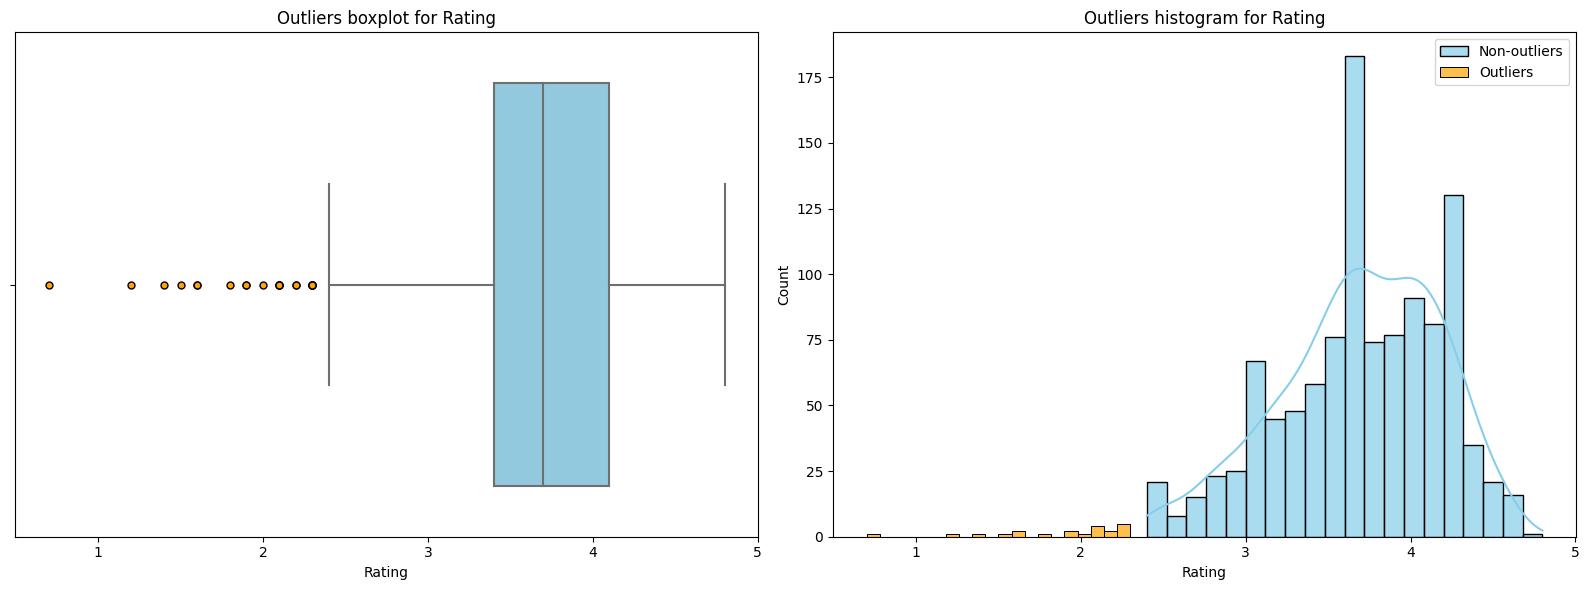

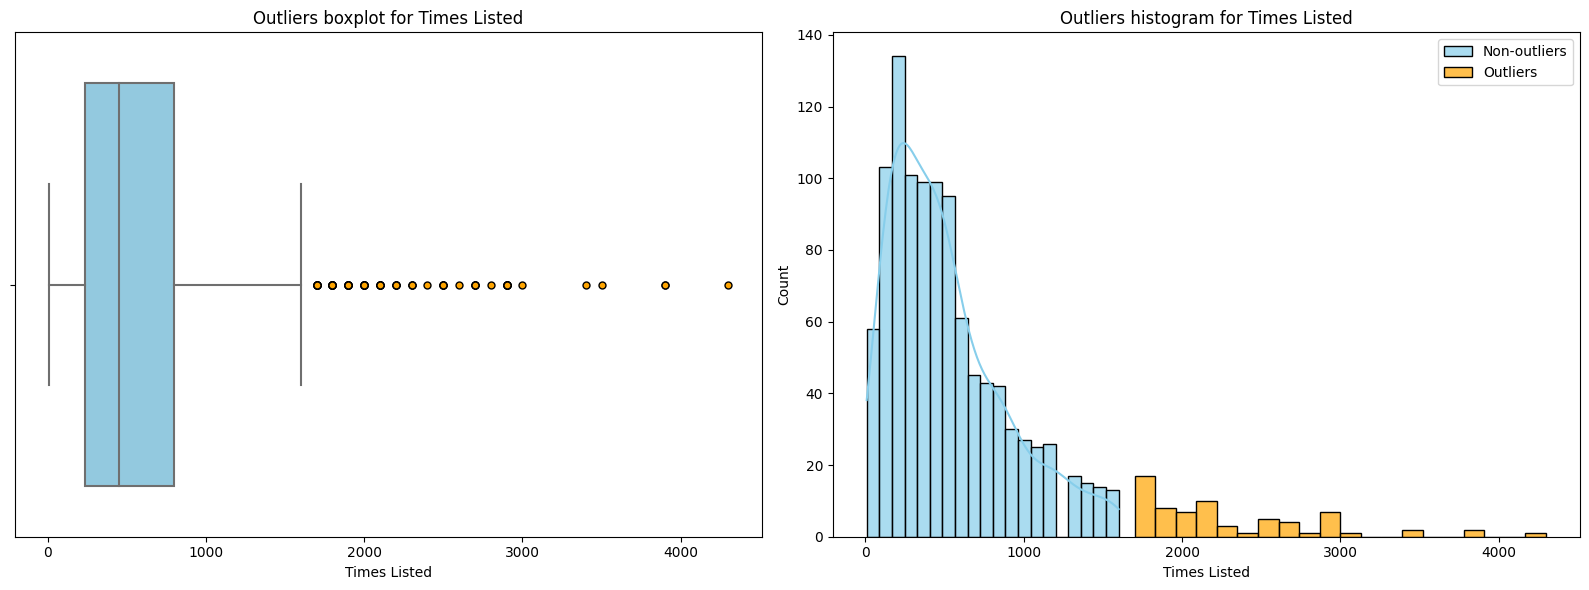

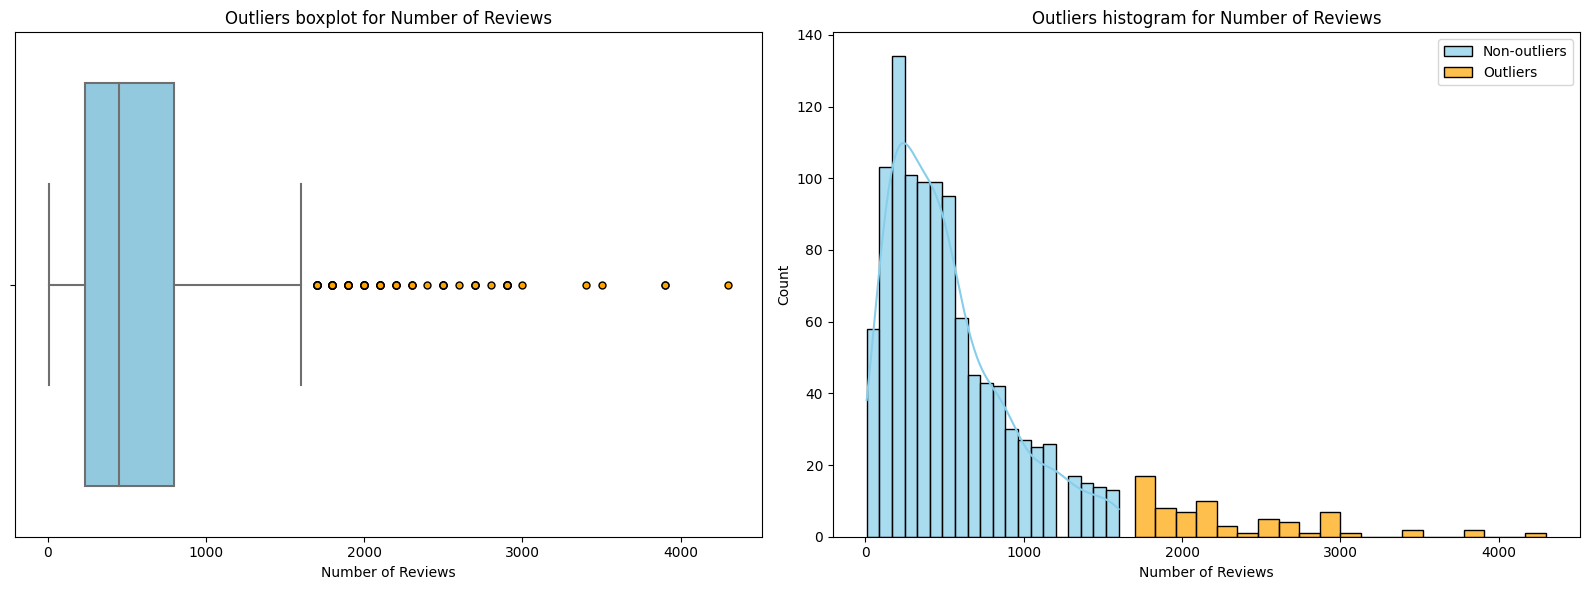

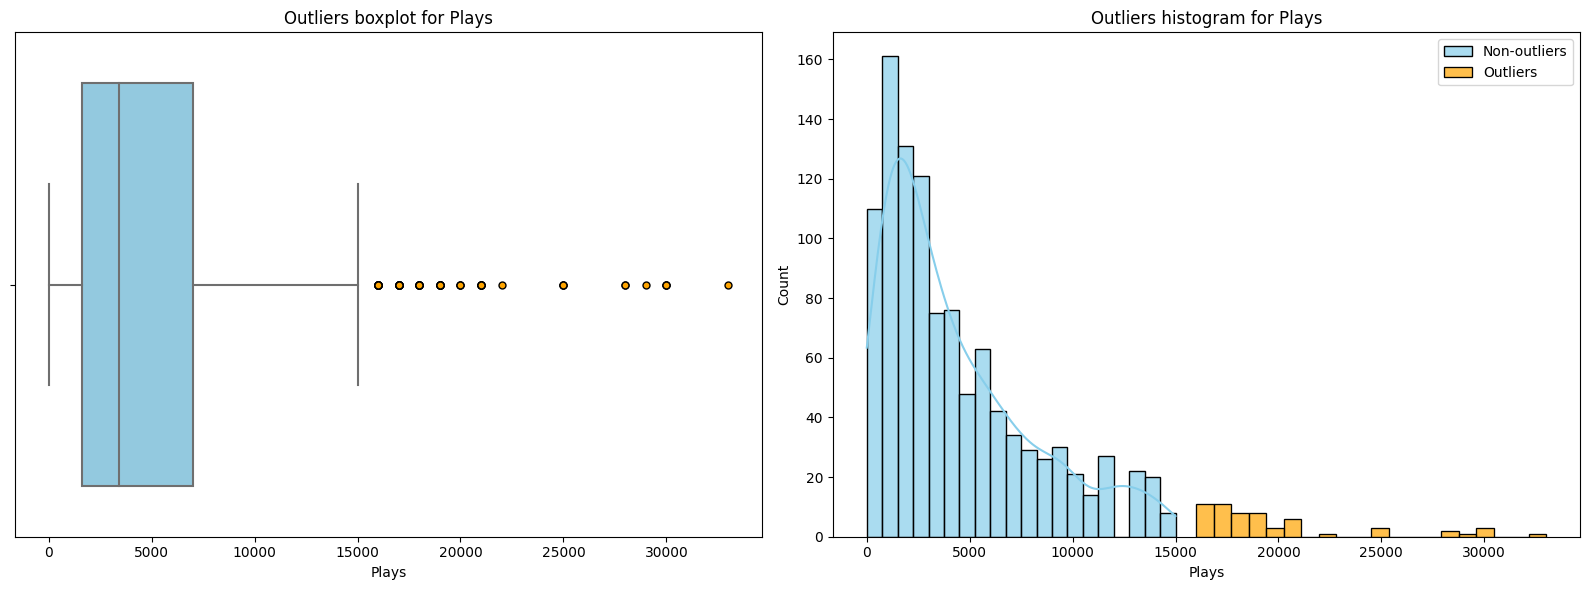

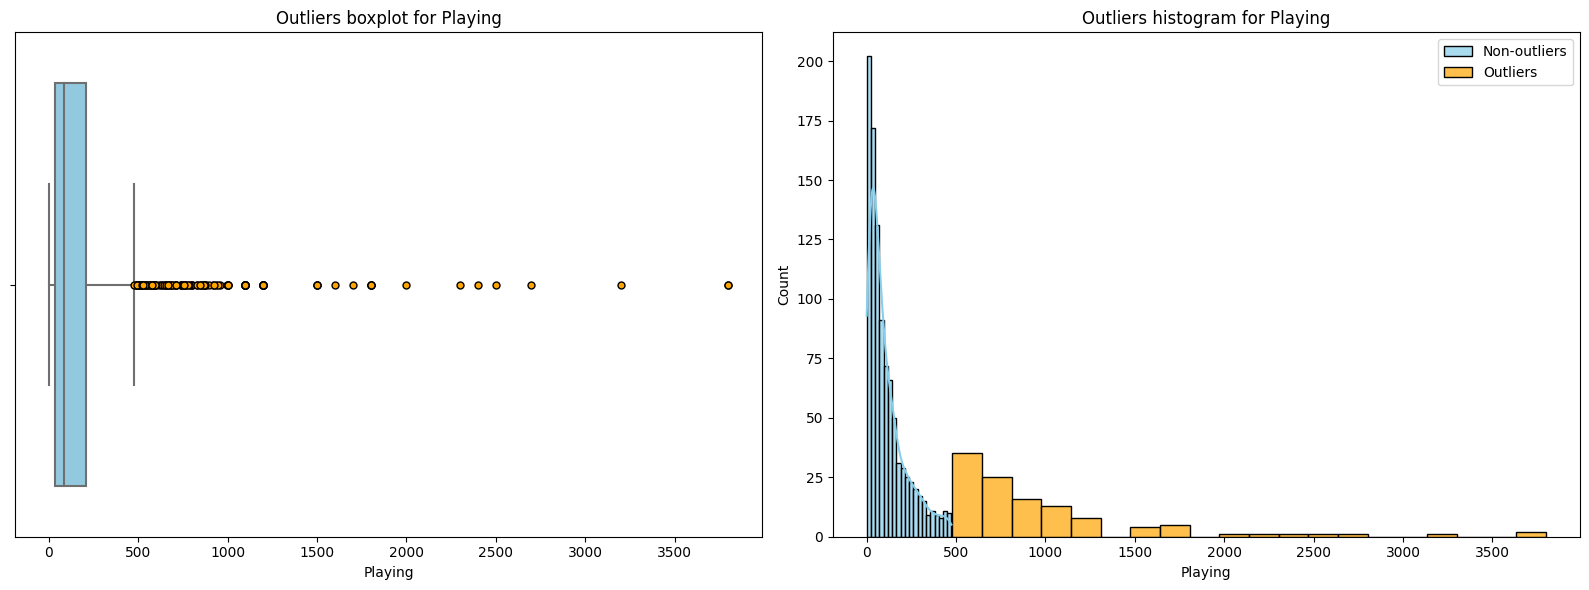

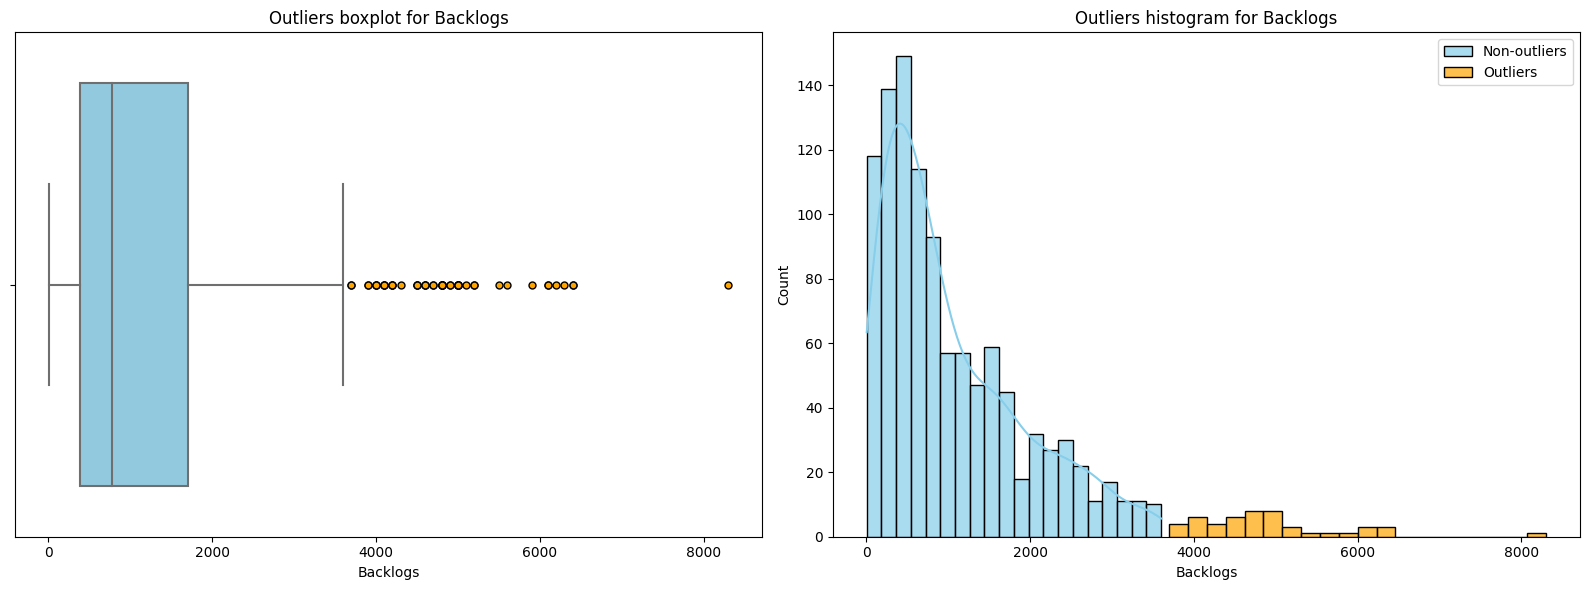

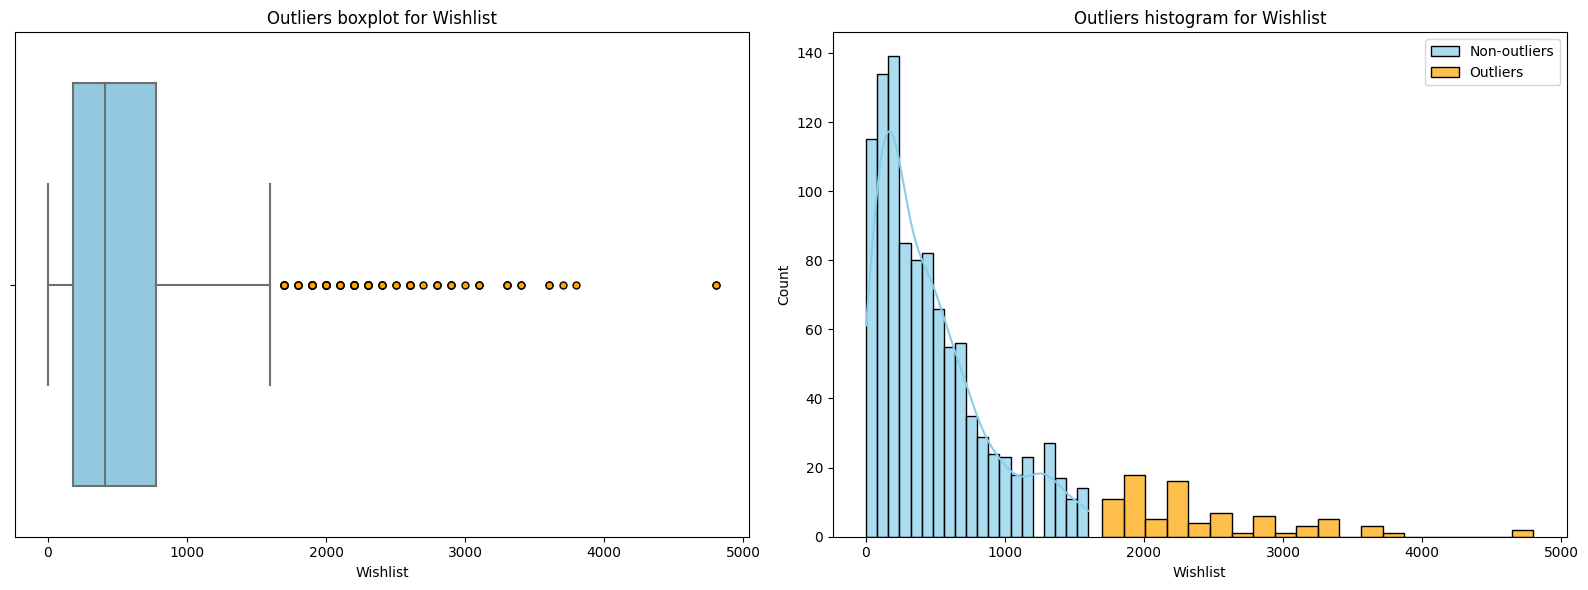

In [22]:
numeric_columns = ['Rating', 'Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']

for column in numeric_columns:
    # Calculate IQR and determine outliers
    Q1 = games[column].quantile(0.25)
    Q3 = games[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = games[(games[column] < lower_bound) | (games[column] > upper_bound)][column]
    non_outliers = games[(games[column] >= lower_bound) & (games[column] <= upper_bound)][column]
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create a row of 2 subplots

    # Boxplot with colored outliers
    flierprops = {'marker': 'o', 'markerfacecolor': 'orange', 'markeredgecolor': 'black', 'markersize': 5}
    sns.boxplot(x=games[column], ax=axes[0], color='skyblue', flierprops=flierprops)
    axes[0].set_title(f'Outliers boxplot for {column}')

    # Histogram
    sns.histplot(x=non_outliers, bins=20, kde=True, ax=axes[1], label='Non-outliers', color='skyblue', alpha=0.7)
    sns.histplot(x=outliers, bins=20, kde=False, ax=axes[1], label='Outliers', color='orange', alpha=0.7)
    axes[1].set_title(f'Outliers histogram for {column}')
    axes[1].legend()


    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

**At result:**

*Rating:*

* *Boxplot:* Most of the ratings are clustered between 2.5 and 4.5, with several lower outliers below 2.5.
* *Histogram:* Shows a concentration of ratings around 3 to 4, with fewer instances of low ratings (outliers).

*Times Listed:*

* *Boxplot:* Most values are below 1000, with numerous outliers above this threshold.
* *Histogram:* Displays a right-skewed distribution, with most values below 1000, and some extreme values (outliers) above this range.

*Number of Reviews:*

* *Boxplot:* Similar to 'Times Listed,' most values are below 1000, with several high outliers.
* *Histogram:* Right-skewed, showing most games receive fewer reviews, and some popular games receive many more reviews (outliers).

*Plays:*

* *Boxplot:* Most values are between 0 and 5000, with numerous high outliers.
* *Histogram:* Indicates that while most games have fewer plays, some are extremely popular (outliers).

*Playing:*

* *Boxplot:* Most values are below 500, with several outliers above this mark.
* *Histogram:* Right-skewed, showing that most games have a low number of current players, but some are still very actively played (outliers).

*Backlogs:*

* *Boxplot:* Most values are below 2000, with numerous outliers above this range.
* *Histogram:* Right-skewed, illustrating that most games have a low backlog, but some are highly anticipated yet not played (outliers).

*Wishlist:*

* *Boxplot:* Most values are below 1000, with several high outliers.
* *Histogram:* Right-skewed, showing that while most games have moderate wishlists, some are highly desired (outliers).

**Key Takeaways:**

* *Outliers:* The boxplots with colored outliers clearly indicate which data points deviate significantly from the majority. These outliers represent games that either perform exceptionally well or poorly in each metric.
* *Distribution:* The histograms provide insight into the general distribution of each column. Most of the data follows a right-skewed distribution, indicating that there are a few extremely popular games (outliers), while the majority fall within a more moderate range.

### Investigate outliers in columns

#### Inspect of rows of minimal ratings

In [23]:
outliers_rating_min = outliers_rating.sort_values(by="Rating", ascending=True)
print(f"Rating outliers: {len(outliers_rating_min)} columns")
outliers_rating_min.head()

Rating outliers: 21 columns


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Game ID,,,,,,,,,,,,,
1459,Superman: The New Superman Adventures,1999-05-31,"[Titus Software, WB Games]",0.7,69,69,"[Adventure, Shooter]","Superman: The New Adventures, often referred t...",[Did you know there's a multi-player mode? No...,859,2,76,55
748,Garten of Banban,2023-01-06,[Euphoric Brothers],1.2,26,26,"[Adventure, Indie, Puzzle]","Enter Banban's Kindergarten, and you're sure t...",[Jumbo Josh BRAH! From hit indie horror game g...,130,1,5,4
1427,Mega Man X7,2003-07-17,"[Capcom Production Studio 3, Capcom]",1.4,231,231,"[Adventure, Platform]",The plot of Mega Man X7 takes place in the 22n...,[Talvez um dos Mega mans mais injustiçados.\n ...,1300,6,385,113
1250,Garten of Banban 2,2023-03-03,[Euphoric Brothers],1.5,16,16,"[Adventure, Indie]",Continue the story of Banban’s Kindergarten. D...,[You can beat the game and then refund it imme...,55,0,6,3
1496,Mighty No. 9,2016-06-21,"[Inti Creates, Deep Silver]",1.6,137,137,"[Adventure, Arcade, Platform, Shooter]",Mighty No. 9 is focused on 2D platforming with...,"[I'd rather have nothing, Better than nothing,...",907,5,263,71


#### Inspect of rows of maximal listed times

In [24]:
outliers_times_listed_max = outliers_times_listed.sort_values(by="Times Listed", ascending=False)
print(f"Listed Times outliers: {len(outliers_times_listed_max)} columns")
outliers_times_listed_max.head()

Listed Times outliers: 69 columns


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Game ID,,,,,,,,,,,,,
3,The Legend of Zelda: Breath of the Wild,2017-03-03,"[Nintendo, Nintendo EPD Production Group No. 3]",4.4,4300,4300,"[Adventure, RPG]",The Legend of Zelda: Breath of the Wild is the...,[This game is the game (that is not CS:GO) tha...,30000,2500,5000,2600
1,Elden Ring,2022-02-25,"[Bandai Namco Entertainment, FromSoftware]",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",[The first playthrough of elden ring is one of...,17000,3800,4600,4800
777,Elden Ring,2022-02-25,"[Bandai Namco Entertainment, FromSoftware]",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",[By far one of the most disappointing game I'v...,17000,3800,4600,4800
4,Undertale,2015-09-15,"[tobyfox, 8-4]",4.2,3500,3500,"[Adventure, Indie, RPG, Turn Based Strategy]","A small child falls into the Underground, wher...",[soundtrack is tied for #1 with nier automata....,28000,679,4900,1800
15,Bloodborne,2015-03-24,"[FromSoftware, Sony Computer Entertainment]",4.5,3400,3400,"[Adventure, RPG]",An action RPG in which the player embodies a H...,"[I'm not trying to brag, but Bloodborne wasn't...",17000,1100,5600,3300


#### Inspect of rows of maximal number of reviews

In [25]:
outliers_num_of_rew_max = outliers_num_of_rew.sort_values(by="Number of Reviews", ascending=False)
print(f"Number of Reviews outliers: {len(outliers_num_of_rew_max)} columns")
outliers_num_of_rew_max.head()

Number of Reviews outliers: 69 columns


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Game ID,,,,,,,,,,,,,
3,The Legend of Zelda: Breath of the Wild,2017-03-03,"[Nintendo, Nintendo EPD Production Group No. 3]",4.4,4300,4300,"[Adventure, RPG]",The Legend of Zelda: Breath of the Wild is the...,[This game is the game (that is not CS:GO) tha...,30000,2500,5000,2600
1,Elden Ring,2022-02-25,"[Bandai Namco Entertainment, FromSoftware]",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",[The first playthrough of elden ring is one of...,17000,3800,4600,4800
777,Elden Ring,2022-02-25,"[Bandai Namco Entertainment, FromSoftware]",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",[By far one of the most disappointing game I'v...,17000,3800,4600,4800
4,Undertale,2015-09-15,"[tobyfox, 8-4]",4.2,3500,3500,"[Adventure, Indie, RPG, Turn Based Strategy]","A small child falls into the Underground, wher...",[soundtrack is tied for #1 with nier automata....,28000,679,4900,1800
15,Bloodborne,2015-03-24,"[FromSoftware, Sony Computer Entertainment]",4.5,3400,3400,"[Adventure, RPG]",An action RPG in which the player embodies a H...,"[I'm not trying to brag, but Bloodborne wasn't...",17000,1100,5600,3300


#### Inspect of rows of maximal plays

In [26]:
outliers_plays_max = outliers_plays.sort_values(by="Plays", ascending=False)
print(f"Plays outliers: {len(outliers_plays_max)} columns")
outliers_plays_max.head()

Plays outliers: 58 columns


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Game ID,,,,,,,,,,,,,
6,Minecraft,2011-11-18,[Mojang Studios],4.3,2300,2300,"[Adventure, Simulator]",Minecraft focuses on allowing the player to ex...,[Minecraft is what you make of it. Unfortunate...,33000,1800,1100,230
24,Grand Theft Auto V,2013-09-17,"[Rockstar North, Rockstar Games]",3.8,2100,2100,"[Adventure, Shooter]",Grand Theft Auto V is a vast open world game s...,[People be rating this a 3.... BITCH BE SERIOU...,30000,829,3200,664
3,The Legend of Zelda: Breath of the Wild,2017-03-03,"[Nintendo, Nintendo EPD Production Group No. 3]",4.4,4300,4300,"[Adventure, RPG]",The Legend of Zelda: Breath of the Wild is the...,[This game is the game (that is not CS:GO) tha...,30000,2500,5000,2600
800,Grand Theft Auto V,2013-09-17,"[Rockstar North, Rockstar Games]",3.8,2100,2100,"[Adventure, Shooter]",Grand Theft Auto V is a vast open world game s...,"[O Trevor é tipo eu quando o Benfica perde, Pe...",30000,829,3200,664
14,Portal 2,2011-04-18,"[Valve, Electronic Arts]",4.4,2900,2900,"[Adventure, Platform, Puzzle, Shooter]","Sequel to the acclaimed Portal (2007), Portal ...","[This is my fav game of all time, everything a...",29000,471,3900,1200


#### Inspect of rows of maximal playing

In [27]:
outliers_playing_max = outliers_playing.sort_values(by="Playing", ascending=False)
print(f"Playing outliers: {len(outliers_playing_max)} columns")
outliers_playing_max.head()

Playing outliers: 114 columns


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Game ID,,,,,,,,,,,,,
1,Elden Ring,2022-02-25,"[Bandai Namco Entertainment, FromSoftware]",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",[The first playthrough of elden ring is one of...,17000,3800,4600,4800
777,Elden Ring,2022-02-25,"[Bandai Namco Entertainment, FromSoftware]",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",[By far one of the most disappointing game I'v...,17000,3800,4600,4800
2,Hades,2019-12-10,[Supergiant Games],4.3,2900,2900,"[Adventure, Brawler, Indie, RPG]",A rogue-lite hack and slash dungeon crawler in...,[convinced this is a roguelike for people who ...,21000,3200,6300,3600
39,Genshin Impact,2020-09-28,"[miHoYo, HoYoverse]",2.6,653,653,"[Adventure, RPG]","Genshin Impact is an open-world action RPG, wh...","[it's alright, the story is really interesting...",14000,2700,1300,280
3,The Legend of Zelda: Breath of the Wild,2017-03-03,"[Nintendo, Nintendo EPD Production Group No. 3]",4.4,4300,4300,"[Adventure, RPG]",The Legend of Zelda: Breath of the Wild is the...,[This game is the game (that is not CS:GO) tha...,30000,2500,5000,2600


#### Inspect of rows of maximal backlogs

In [28]:
outliers_backlogs_max = outliers_backlogs.sort_values(by="Backlogs", ascending=False)
print(f"Backlogs outliers: {len(outliers_backlogs_max)} columns")
outliers_backlogs_max.head()

Backlogs outliers: 49 columns


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Game ID,,,,,,,,,,,,,
5,Hollow Knight,2017-02-24,[Team Cherry],4.4,3000,3000,"[Adventure, Indie, Platform]",A 2D metroidvania with an emphasis on close co...,"[this games worldbuilding is incredible, with ...",21000,2400,8300,2300
17,Yakuza 0,2015-03-12,"[Ryū Ga Gotoku Studios, Sega]",4.4,2700,2700,"[Adventure, Brawler, RPG, Simulator]","The glitz, glamour, and unbridled decadence of...",[THIS IS PEAK IT IS ONE OF MY FAVORITE GAMES I...,15000,1800,6400,2000
343,Yakuza 0,2015-03-12,"[Ryū Ga Gotoku Studios, Sega]",4.4,2700,2700,"[Adventure, Brawler, RPG, Simulator]","The glitz, glamour, and unbridled decadence of...",[O amor platónico entre um muro de cimento e u...,15000,1800,6400,2000
2,Hades,2019-12-10,[Supergiant Games],4.3,2900,2900,"[Adventure, Brawler, Indie, RPG]",A rogue-lite hack and slash dungeon crawler in...,[convinced this is a roguelike for people who ...,21000,3200,6300,3600
10,NieR: Automata,2017-02-23,"[PlatinumGames, Square Enix]",4.3,2900,2900,"[Brawler, RPG]","NieR: Automata tells the story of androids 2B,...","[Holy shit, im carrying the weight of the wooo...",18000,1100,6200,3600


#### Inspect of rows of maximal wishlist

In [29]:
outliers_wishlist_max = outliers_wishlist.sort_values(by="Wishlist", ascending=False)
print(f"Wishlist outliers: {len(outliers_wishlist_max)} columns")
outliers_wishlist_max.head()

Wishlist outliers: 83 columns


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Game ID,,,,,,,,,,,,,
1,Elden Ring,2022-02-25,"[Bandai Namco Entertainment, FromSoftware]",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",[The first playthrough of elden ring is one of...,17000,3800,4600,4800
777,Elden Ring,2022-02-25,"[Bandai Namco Entertainment, FromSoftware]",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",[By far one of the most disappointing game I'v...,17000,3800,4600,4800
7,Omori,2020-12-25,"[OMOCAT, PLAYISM]",4.2,1600,1600,"[Adventure, Indie, RPG, Turn Based Strategy]",A turn-based surreal horror RPG in which a chi...,"[The best game I've played in my life, omori i...",7200,1100,4500,3800
32,NieR Replicant ver.1.22474487139...,2021-04-22,"[Toylogic, Square Enix]",4.2,1500,1500,"[Adventure, RPG]",NieR Replicant ver.1.22474487139... is an upda...,"[Not as good as automata but still slaps, Tem ...",6700,880,4100,3700
10,NieR: Automata,2017-02-23,"[PlatinumGames, Square Enix]",4.3,2900,2900,"[Brawler, RPG]","NieR: Automata tells the story of androids 2B,...","[Holy shit, im carrying the weight of the wooo...",18000,1100,6200,3600


**At result:**

*Rating Outliers*

* These are games with very low or unusually high ratings compared to others.
* Example: Games with ratings like 0.7 or 1.5 are significantly lower than the average, indicating poor user reception.
* Outliers with high ratings (like 4.5) show universally praised games.

*Times Listed Outliers*

* Indicates games that users frequently added to their lists.
* High outliers, such as games with 4500 times listed, suggest immense popularity or widespread interest.

*Number of Reviews Outliers*

* These represent games that received an exceptionally high number of reviews.
* High review counts (e.g., 4000 reviews) likely reflect strong engagement or fanbases.

*Plays Outliers*

* Games with significantly high numbers of plays (e.g., 17000) are extremely well-played titles, reflecting strong replay value or high accessibility.

*Playing Outliers*

* Represents the number of users currently playing.
* A high value in this column, like 4800 users playing, highlights games with active, engaged communities.

*Backlogs Outliers*

* Shows games that many users own but have not started playing.
* High backlog values, such as 6000, could indicate the game's hype, large size, or time commitment required.

*Wishlist Outliers*

* High wishlist numbers (e.g., 4800) reflect anticipation and interest among users who have yet to play.

**General Insights:**

* *Popularity Correlation:* Games with high "Times Listed", "Number of Reviews", "Plays", "Playing", "Backlogs" and "Wishlist" values tend to also have high ratings, confirming their popularity.
* *Discrepancies:* Some games might have a high number of plays but relatively low ratings, suggesting overhyped or disappointing experiences.
* It seems that outliers not from result of error of data and they are critical to keep, because it can help in further analysises of popularities.

### Count every categorical column per unique with counting any unique

#### Games Title:

In [30]:
# Count title games and group by unique value for each column

print(f"\nMost games titles: \n{games['Title'].value_counts().head(50)}")
print(f"\nLeast games titles: \n{games['Title'].value_counts().tail(50)}")
print(f"\nThere have {games['Title'].nunique()} game titles")


Most games titles: 
Title
Doom                                           3
Elden Ring                                     2
Splatoon 3                                     2
Persona 4 Golden                               2
Fallout: New Vegas                             2
Resident Evil 2                                2
The Witcher 3: Wild Hunt                       2
Chrono Trigger                                 2
Super Mario Sunshine                           2
League of Legends                              2
Yakuza Kiwami                                  2
Shadow of the Colossus                         2
Cyberpunk 2077                                 2
Live A Live                                    2
Guilty Gear: Strive                            2
Dead Space                                     2
Tomb Raider                                    2
Persona 3 Portable                             2
Demon's Souls                                  2
Assassin's Creed                          

#### Release Dates:

In [31]:
# Count title release dates and group by unique value for each column
print(f"\nFirst release dates: \n{games['Release Date'].value_counts().head(25)}")
print(f"\nLast release dates: \n{games['Release Date'].value_counts().tail(25)}")
print(f"\nThere have {games['Release Date'].nunique()} release dates")


First release dates: 
Release Date
2020-11-12    5
2006-11-19    4
2014-11-11    3
2019-11-15    3
2022-11-18    3
2007-11-13    3
2005-12-22    3
2011-11-01    3
2022-12-02    3
2021-06-11    3
2001-12-20    3
2022-10-28    3
2013-09-26    3
2011-11-08    3
2016-11-18    3
2016-06-21    2
2017-07-25    2
2020-02-20    2
2002-10-21    2
2002-11-17    2
2001-02-27    2
2011-02-22    2
2010-03-16    2
2008-10-14    2
2006-11-07    2
Name: count, dtype: int64

Last release dates: 
Release Date
2022-12-07    1
1997-11-13    1
2018-12-10    1
2002-05-01    1
2022-08-16    1
2013-04-16    1
1980-05-22    1
2015-04-13    1
2004-07-15    1
2008-09-16    1
2019-12-09    1
2021-08-20    1
2010-11-21    1
1999-05-12    1
2011-08-23    1
2000-11-21    1
2021-09-28    1
2012-07-28    1
2006-09-28    1
2018-02-27    1
2022-10-18    1
2019-02-21    1
2014-11-10    1
2019-04-22    1
2014-02-04    1
Name: count, dtype: int64

There have 976 release dates


#### Teams:

In [32]:
# Flatten the 'Teams' column and count occurrences
team_counts = {}
for teams in games['Team']:
    for team in teams:
        team_counts[team] = team_counts.get(team, 0) + 1

# Get the top 50 teams by count
top_50_teams = sorted(team_counts.items(), key=lambda x: x[1], reverse=True)[:50]

# Print team counts for top 50 teams
print(f"\nTeam Counts:")
for team, count in top_50_teams:
    print(f"- {team}: {count} games")

# Print total team counts
total_unique_teams = len(set(team for teams in games['Team'] for team in teams))
print(f"\nTotal Unique Teams: {total_unique_teams}")


Team Counts:
- Nintendo: 173 games
- Capcom: 64 games
- Square Enix: 57 games
- Sega: 47 games
- Electronic Arts: 42 games
- Konami: 31 games
- Activision: 30 games
- Bandai Namco Entertainment: 29 games
- Ubisoft Entertainment: 28 games
- Atlus: 26 games
- Sony Interactive Entertainment: 24 games
- Nintendo EAD: 22 games
- Game Freak: 20 games
- Sony Computer Entertainment: 18 games
- Bethesda Softworks: 18 games
- Square: 18 games
- WB Games: 18 games
- FromSoftware: 17 games
- Ubisoft Montreal: 17 games
- Sonic Team: 16 games
- Devolver Digital: 15 games
- Intelligent Systems Co., Ltd.: 14 games
- Sony Computer Entertainment, Inc. (SCEI): 14 games
- 2K Games: 14 games
- Annapurna Interactive: 12 games
- Valve: 12 games
- Rockstar Games: 12 games
- Naughty Dog: 12 games
- HAL Laboratory: 11 games
- NIS America: 11 games
- Microsoft Game Studios: 11 games
- Ryū Ga Gotoku Studios: 10 games
- PlatinumGames: 9 games
- Spike ChunSoft: 9 games
- Arc System Works: 9 games
- Namco: 9 games


***Games:***

In [33]:
# Flatten the 'Genres' column and count occurrences
genre_counts = {}
for genres in games['Genres']:
    for genre in genres:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

# Print genre counts
print(f"\nGenre Counts:")
for genre, count in genre_counts.items():
    print(f"- {genre}: {count} games")

# Print total genre counts
total_unique_genres = len(set(genre for genres in games['Genres'] for genre in genres))
print(f"\nTotal Unique Genres: {total_unique_genres}") 


Genre Counts:
- Adventure: 726 games
- RPG: 367 games
- Brawler: 107 games
- Indie: 205 games
- Turn Based Strategy: 71 games
- Platform: 243 games
- Simulator: 95 games
- Strategy: 117 games
- Puzzle: 131 games
- Shooter: 263 games
- Music: 21 games
- Fighting: 64 games
- Arcade: 60 games
- Visual Novel: 54 games
- Card & Board Game: 13 games
- Tactical: 42 games
- Racing: 37 games
- Point-and-Click: 36 games
- MOBA: 3 games
- Sport: 20 games
- Real Time Strategy: 9 games
- Quiz/Trivia: 3 games
- Other: 2 games
- Pinball: 1 games

Total Unique Genres: 24


***Summaries:***

In [34]:
# Count the occurrences of each unique summary
summary_counts = games['Summary'].value_counts()

print(f"\nSummary Counts:")
for i, (summary, count) in enumerate(summary_counts.items()):
    if i < 20:  # Display only the first 20 summaries
        print(f"\n-'{summary}' - {count} sums")

print(f"\nTotal summaries: {games['Summary'].nunique()} summaries") 


Summary Counts:

-'Elden Ring is a fantasy, action and open world game with RPG elements such as stats, weapons and spells. Rise, Tarnished, and be guided by grace to brandish the power of the Elden Ring and become an Elden Lord in the Lands Between.' - 2 sums

-'The Pokémon Scarlet and Pokémon Violet games, the newest chapters in the Pokémon series, are coming to Nintendo Switch later this year. With these new titles, the Pokémon series takes a new evolutionary step, allowing you to explore freely in a richly expressed open world.
             

              Various towns blend seamlessly into the wilderness with no borders. You’ll be able to see the Pokémon of this region in the skies, in the seas, in the forests, on the streets—all over! You’ll be able to experience the true joy of the Pokémon series—battling against wild Pokémon in order to catch them—now in an open-world game that players of any age can enjoy.​' - 2 sums

-'Yakuza Kiwami is a remake of the 2005 open world action

***Reviews:***

In [35]:
# Flatten the 'Reviews' column and count occurrences
review_counts = {}
for reviews in games['Reviews']:
    for review in reviews:
        review_counts[review] = review_counts.get(review, 0) + 1

# Print first 20 review counts
print("\nReviews Counts:")
for i, (review, count) in enumerate(review_counts.items()):
    if i < 20:
        print(f"- '{review}': {count} reviews")
    else:
        break

# Print total reviews counts
total_unique_reviews = len(set(review for reviews in games['Reviews'] for review in reviews))
print(f"\nTotal Unique Reviews: {total_unique_reviews}")


Reviews Counts:
- 'The first playthrough of elden ring is one of the best eperiences gaming can offer you but after youve explored everything in the open world and you've experienced all of the surprises you lose motivation to go exploring on repeat playthroughs which takes a lot away from the replayability which is a very important thing for from games imo.': 2 reviews
- 'a replay solidified my love for elden ring. so easily my favorite game of all time. actually beating malenia this time was also an amazing feeling. i just love being in this world man its the greatest of all time': 2 reviews
- 'The game is absolutely beautiful, with so much to do. The replayability is crazy. And it never gets old with it too.': 2 reviews
- 'Took everything great about the Soulsborne games and make it 100% better.': 2 reviews
- 'I play with my overlevelled friend every time and we still fail sometimes (he’s on NG6), insanely difficult game lol
                     
                     gorgeous graph

**At result:**

* We can see that we have 1,085 game titles.
* We can see that we have 976 release dates.
* We can see that we have 659 teams.
* We can see that we have 24 genres.
* We can see that we have 1,099 summaries.
* We can see that we have 6,560 reviews.

### Display games by earliest release date

In [36]:
# Games by earliest release date
first_released_games = games.sort_values(by='Release Date', ascending=True)
first_released_games.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Game ID,,,,,,,,,,,,,
592,Pac-Man,1980-05-22,"[Wiz, Namco Networks America, Inc.]",3.4,427,427,[Arcade],Pac-Man is an arcade game developed by Namco a...,[Pacman is such a fucking idiot jesus christ. ...,5200,7,108,31
1455,Ms. Pac-Man,1982-02-03,"[Atari, Inc., General Computer Corporation (GCC)]",3.6,198,198,[Arcade],"In 1982, a sequel to the incredibly popular Pa...","[Do you really need a review of Ms. Pac- Man?,...",1600,1,45,38
76,Super Mario Bros.,1985-09-13,"[Nintendo, Nintendo R&D4]",3.5,1500,1500,"[Adventure, Platform]",A side scrolling 2D platformer and first entry...,"[I actually had no idea this game was so long,...",18000,59,733,237
196,The Legend of Zelda,1986-02-21,"[Nintendo EAD, Nintendo]",3.2,1200,1200,[Adventure],The Legend of Zelda is the first title in the ...,"[Managed to 100% this in less than two hours, ...",9300,132,1500,463
1398,Bubble Bobble,1986-06-16,"[Sega, Taito Corporation]",3.3,187,187,"[Arcade, Platform, Puzzle, Strategy]","In the game, each player controls one of the t...","[A very solid port of the arcade, much more fa...",1400,3,110,57


**At result:**
* There have games with earliest release dates like 'Pac-Man' (released on 22/05/1980), 'Ms. Pac-Man' (released on 03/02/1982), 'Super Mario Bros' (released on 21/09/1985), 'The Legend of Zelda' (released on 21/02/1986) and 'Bubble Bobble' (released on 16/06/1986).

### Display games by most recent release date

In [37]:
# Games by most recent release date
recent_released_games = games.sort_values(by='Release Date', ascending=False)
recent_released_games.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Game ID,,,,,,,,,,,,,
1253,Elden Ring: Shadow of the Erdtree,2024-06-21,"[FromSoftware, Bandai Namco Entertainment]",4.8,18,18,"[Adventure, RPG]",An expansion to Elden Ring setting players on ...,[I really loved that they integrated Family Gu...,1,0,39,146
665,Bayonetta Origins: Cereza and the Lost Demon,2023-03-17,"[PlatinumGames, Nintendo]",4.0,116,116,"[Adventure, Puzzle]",Long before this trainee of the dark arts woul...,"[I'm gonna be honest, I didn't expect much fro...",48,40,117,329
1021,Wo Long: Fallen Dynasty,2023-03-03,"[Koei Tecmo Games, Team NINJA]",3.5,284,284,"[Adventure, RPG]",Set in the Later Han Dynasty of the Three King...,[Incredibly good action game that I half wish ...,513,241,390,727
1250,Garten of Banban 2,2023-03-03,[Euphoric Brothers],1.5,16,16,"[Adventure, Indie]",Continue the story of Banban’s Kindergarten. D...,[You can beat the game and then refund it imme...,55,0,6,3
1445,Phantom Brigade,2023-02-28,[Brace Yourself Games],2.8,16,16,"[Indie, RPG, Strategy, Tactical, Turn Based St...",Phantom Brigade is a hybrid real-time and turn...,"[Played it for a short session, and considerin...",16,10,30,51


**At result:**
* There have games with latest release dates like 'Elden Ring: Shadow of the Erdtree' (released on 21/06/2021), 'Bayonetta Origins: Cereza and the Lost Demon' (released on 17/03/2023), 'Wo Long: Fallen Dynasty' (released on 03/03/2023), 'Garten of Banban 2' (released on 03/03/2023) and 'Phantom Brigade' (released on 28-02-2023).

### Filter games that unique game title more than one game title and display it

In [38]:
# Group by 'Title' and count the occurrences
title_counts = games['Title'].value_counts()

# Filter titles that appear more than once
non_unique_titles = title_counts[title_counts > 1].index

# Filter the original dataset for these titles
games_with_non_unique_titles = games[games['Title'].isin(non_unique_titles)]

# Display the filtered games sorted by Title
games_with_non_unique_titles = games_with_non_unique_titles.sort_values('Title')
print(f"Games that have same unique titles than one: {games_with_non_unique_titles['Title'].nunique()}")
games_with_non_unique_titles.head(25)

Games that have same unique titles than one: 30


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Game ID,,,,,,,,,,,,,
457,Assassin's Creed,2007-11-13,"[Ubisoft Montreal, Ubisoft Entertainment]",2.9,801,801,"[Adventure, Platform]",Assassin's Creed is a non-linear action-advent...,"[O Altair parece um mitra do Cerco, mas de res...",13000,118,1200,496
190,Assassin's Creed,2007-11-13,"[Ubisoft Montreal, Ubisoft Entertainment]",2.9,801,801,"[Adventure, Platform]",Assassin's Creed is a non-linear action-advent...,"[In this first game, the story and switching b...",13000,118,1200,496
1126,Chrono Trigger,2008-11-20,[Square Enix],4.4,295,295,[Adventure],When a newly developed teleportation device ma...,"[Happy 28th Birthday., Jugada en su version de...",2400,135,1300,499
67,Chrono Trigger,1995-03-11,[Square],4.5,1900,1900,"[Adventure, RPG]","In this turn-based Japanese RPG, young Crono m...","[Rivetting story, great graphics and music, an...",9100,518,4900,2200
25,Cyberpunk 2077,2020-12-09,[CD Projekt RED],3.3,1500,1500,"[Adventure, RPG, Shooter]","Cyberpunk 2077 is an open-world, action-advent...","[It's a game, I love the setting , lore , visu...",13000,1500,4700,2900
801,Cyberpunk 2077,2020-12-09,[CD Projekt RED],3.3,1500,1500,"[Adventure, RPG, Shooter]","Cyberpunk 2077 is an open-world, action-advent...",[Se tivesse o Fernando Mendes invés do Keanu R...,13000,1500,4700,2900
160,Dead Space,2008-10-14,"[EA Redwood Shores, Electronic Arts]",4.0,1200,1200,[Shooter],Dead Space is a 2008 science fiction survival ...,[Impressionante demais pra Ã©poca e realmente ...,9600,302,2700,1100
150,Dead Space,2023-01-27,"[Motive Studios, Electronic Arts]",4.3,501,501,"[Adventure, RPG, Shooter]",The sci-fi survival horror classic Dead Space ...,[Pretty damn good\n \n ...,1300,248,985,1900
187,Demon's Souls,2020-11-12,"[Bluepoint Games, Sony Interactive Entertainment]",3.9,880,880,"[Adventure, RPG]",Entirely rebuilt from the ground up and master...,"[World tendency gives me unneeded anxiety, Now...",4100,403,2400,2100


**At result:**

* Some of games with same title like 'Chrono Trinker', 'Dead Space', 'Demon Souls', 'Doom', 'Final Fantasy VII' and 'God of War' have different release dates and teams. It seems that these games have remake of the games.
* Some of games with same title like 'Assassin's Creed', 'Cyberpunk 2077', 'Elden Ring', 'Fallout: New Vegas", "Grand Theft Auto V" and "Guilty Gear: Strive" have different reviews.

### List top-10 most popular games include plays, playing, times listed, wishlist, backlogs and rating and then visualize with barplot.

#### Sort the top-10 most rated video games with using title, release date, plays, playing, rating, number of reviews, backlogs and wishlists.

In [39]:
weighted_games = games.copy()

# Calculate a weighted score
weighted_games['Weighted Score'] = (weighted_games['Plays'] * 0.4 +
                           weighted_games['Number of Reviews'] * 0.3 +
                           weighted_games['Wishlist'] * 0.2 +
                           weighted_games['Rating'] * 0.1)

# Remove duplicates and find the top games by Weighted Score
unique_games = weighted_games.sort_values('Weighted Score', ascending=False).drop_duplicates(subset=['Title', 'Release Date'])
top_weighted_games = unique_games[['Title', 'Release Date', 'Weighted Score', 'Plays', 'Playing', 'Rating', 'Number of Reviews', 'Backlogs', 'Wishlist']].head(10)

top_weighted_games.head(10)


,Title,Release Date,Weighted Score,Plays,Playing,Rating,Number of Reviews,Backlogs,Wishlist
Game ID,,,,,,,,,
6,Minecraft,2011-11-18,13936.43,33000,1800,4.3,2300,1100,230
3,The Legend of Zelda: Breath of the Wild,2017-03-03,13810.44,30000,2500,4.4,4300,5000,2600
800,Grand Theft Auto V,2013-09-17,12763.18,30000,829,3.8,2100,3200,664
14,Portal 2,2011-04-18,12710.44,29000,471,4.4,2900,3900,1200
4,Undertale,2015-09-15,12610.42,28000,679,4.2,3500,4900,1800
19,Portal,2007-10-10,12020.41,28000,244,4.1,2000,2700,1100
20,Super Mario Odyssey,2017-10-27,11270.42,25000,710,4.2,2900,2900,2000
34,Super Smash Bros. Ultimate,2018-12-07,10910.61,25000,1200,4.1,2500,1100,801
9,Among Us,2018-06-15,10285.60,25000,470,3.0,867,776,126


**At result:**

* There have TOP-10 games by popularity: "Minecraft", "The Legend of Zelda: Breath of the Wild	", "Grand Theft Auto V	", "Portal 2", "Undertale", "Portal", "Super Mario Odyssey", "Super Smash Bros. Ultimate", "Among Us" and "Hades"
* Video game with most of weighted score (most popular) is 'Minecraft' - with score 13936.43.
* Video game with most of plays are 'Minecraft' - 3,3000 plays.
* Video game with most of playing is "Hades" - 3,200 playings.
* Video games with highest rating is 'The Legend of Zelda: Breath of the Wild' and 'Portal 2' - rating 4.4.
* Video game with most number of reviews is 'The Legend of Zelda: Breath of the Wild' - 4,300 reviews.
* Most backlogged video game is 'Hades' - 6,300 backlogs.
* Most withlisted video games are 'Hades' and 'The Last of Us' - 3,600 wishlists.


**Overall Observations:**

* Minecraft appears to be the most popular game based on its Weighted Score, which is significantly higher than the other games.
* The Legend of Zelda: Breath of the Wild comes in second place in terms of Weighted Score.
* The table includes a variety of games, ranging from long-standing classics like Minecraft and Portal to newer releases like Hades and Among Us.
* There is a wide range of scores and ratings, indicating diverse opinions and preferences among players.

**Specific Observations:**

* Minecraft has the highest Weighted Score, suggesting it is highly regarded by players and critics. It also has a large number of plays and reviews.
* Grand Theft Auto V has a relatively high Weighted Score despite a lower rating compared to some other games. This could be due to its popularity and high number of plays.
* Portal 2 and Portal have consistently high ratings, indicating they are well-received by players.
* Among Us has a lower rating compared to many of the other games, which could be due to its multiplayer nature and the potential for negative experiences in online games.

**Overall Popularity and Critical Acclaim:**

* Minecraft reigns supreme with the highest Weighted Score, suggesting it's both critically acclaimed and immensely popular among players.
* The Legend of Zelda: Breath of the Wild closely follows, further emphasizing its critical success and player engagement.
* Portal 2 and Portal demonstrate consistent high ratings, highlighting their enduring quality and player satisfaction.

#### Display bar plot top-10 popular video games by plays.

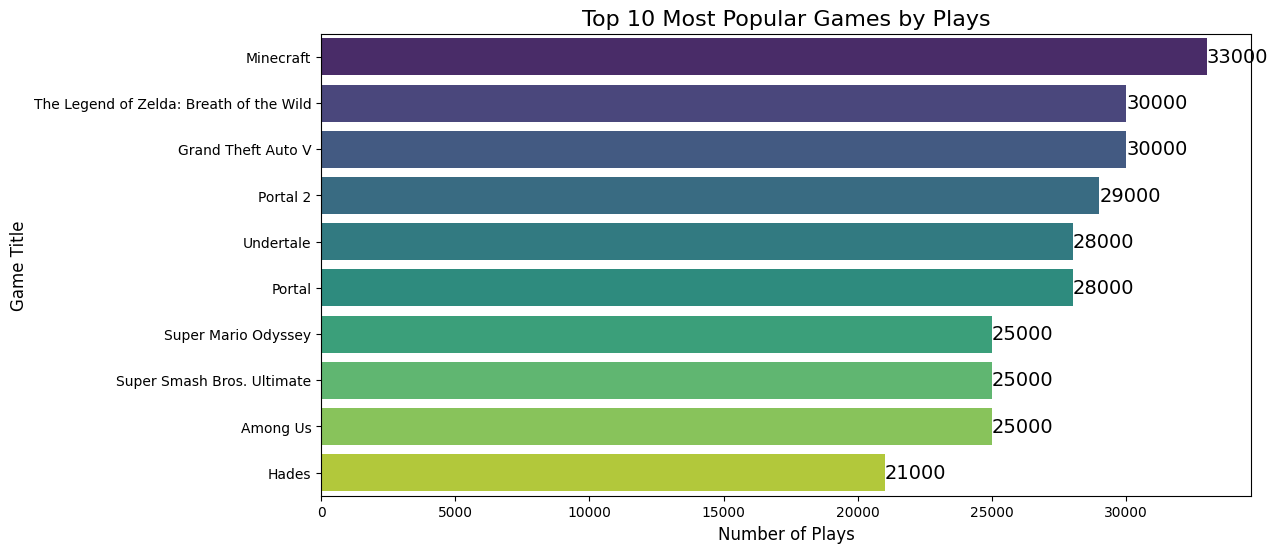

In [40]:
# Sort the data by 'Playing'
top_weighted_games_by_plays = top_weighted_games.sort_values('Plays', ascending=False)

# Create a color palette with as many colors as there are bars
palette = sns.color_palette("viridis", len(top_weighted_games_by_plays))

# Plot with sorted data and mapped palette
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_weighted_games_by_plays, 
    x='Plays', 
    y='Title', 
    palette=palette
)

for index, value in enumerate(top_weighted_games_by_plays['Plays']):
    plt.text(value, index, str(value), fontsize=14, va='center')

plt.title('Top 10 Most Popular Games by Plays', fontsize=16)
plt.xlabel('Number of Plays', fontsize=12)
plt.ylabel('Game Title', fontsize=12)
plt.show()

**At result:**

* *Minecraft Reigns Supreme:* Minecraft tops the list with 33,000 plays, showing its enduring popularity.
* *Close Competition:* The Legend of Zelda: Breath of the Wild and Grand Theft Auto V are nearly tied with 30,000 plays each, suggesting they're both heavily favored by players.
* *Portal Popularity:* Both Portal 2 and Portal have similar play counts of 29,000 and 28,000 respectively, indicating strong interest in this game series.
* *Old Meets New:* The chart features a mix of older classics like Grand Theft Auto V and newer games like Among Us, which have both secured their places in the top 10.
* *Equal Appeal:* Several games share the same number of plays, such as Undertale and Portal (28,000 plays each) and Super Mario Odyssey, Super Smash Bros. Ultimate, and Among Us (25,000 plays each), demonstrating equal levels of engagement.
* *Variation in Genre:* The top games represent a variety of genres, from sandbox (Minecraft) to action-adventure (The Legend of Zelda), to party games (Among Us), showcasing diverse gaming interests.
* *Just Outside the Top:* Hades, with 21,000 plays, shows it's popular but not quite as much as the games above it.

**Insights:**

* *Enduring Popularity:* Games like Minecraft and Grand Theft Auto V remain popular due to their engaging gameplay and expansive worlds.
* *Genre Diversity:* Players enjoy a wide variety of game genres, indicating diverse interests.
* *Franchise Strength:* High play counts for game series like Portal show the value of sequels and franchises.
* *Equal Engagement:* Similar play counts for several games suggest they appeal to similar demographics.
* *Newcomer Success:* New games like Among Us can quickly capture players' attention with innovative gameplay.
* *Cultural Impact:* Top games often become cultural phenomena with significant influence beyond entertainment.
* *Market Viability:* The gaming market is robust and engaged, providing opportunities for new titles.
* *Retention Strategies:* Successful games retain players through regular updates and community engagement.

**Recommendations:**

* *Focus on Quality:* Invest in creating high-quality games with engaging gameplay and expansive worlds to sustain long-term player interest.
* *Diversify Genres:* Explore multiple game genres to reach a wider audience and cater to diverse player preferences.
* *Build Franchises:* Develop and maintain game franchises with consistent quality to foster strong fan loyalty.
* *Innovate:* Introduce new and innovative gameplay elements to capture players' attention quickly and stand out in the market.
* *Cultural Engagement:* Leverage the cultural impact of popular games by creating merchandise, media tie-ins, and community events.
* *Market Analysis:* Continuously analyze the gaming market to identify trends and opportunities for new game development.
* *Retention Efforts:* Implement strategies to retain players, such as regular updates, expansions, and active community engagement.
* *Listen to Players:* Gather feedback from players to understand their preferences and improve future game releases.

#### Display bar plot top-10 popular video games by playing.

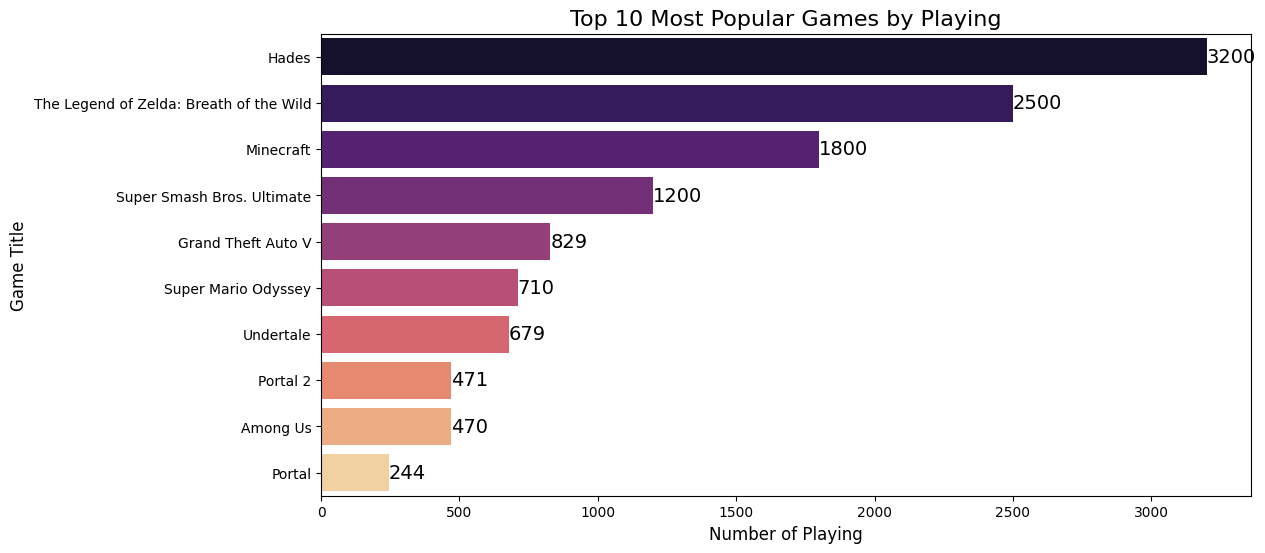

In [41]:
# Sort the data by 'Playing'
top_weighted_games_by_playing = top_weighted_games.sort_values('Playing', ascending=False)

# Create a color palette with as many colors as there are bars
palette = sns.color_palette("magma", len(top_weighted_games_by_playing))

# Plot with sorted data and mapped palette
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_weighted_games_by_playing, 
    x='Playing', 
    y='Title', 
    palette=palette
)

for index, value in enumerate(top_weighted_games_by_playing['Playing']):
    plt.text(value, index, str(value), fontsize=14, va='center')

plt.title('Top 10 Most Popular Games by Playing', fontsize=16)
plt.xlabel('Number of Playing', fontsize=12)
plt.ylabel('Game Title', fontsize=12)
plt.show()

**At result:**

* Hades is significantly more popular than the other games, with a play count of 3200. It's a clear favorite.
* The Legend of Zelda: Breath of the Wild also stands out with 2500 plays, showing a strong preference among players.
* Minecraft holds a solid third place with 1800 plays, indicating its widespread appeal and continued popularity.
* There's a noticeable drop-off in play counts after the top three games, suggesting a more concentrated interest in the leading titles.
* Super Smash Bros. Ultimate and Grand Theft Auto V have 1200 and 829 plays respectively, indicating they are popular but not as dominant as the top three.
* The lower end of the chart, including Super Mario Odyssey, Undertale, Portal 2, Among Us, and Portal, show less frequent play, but still maintain a significant player base.
* The gap between the most and least played games in the top 10 (Hades with 3200 and Portal with 244 plays) illustrates a wide range of player preferences.

**Insights:**

* Dominant Popularity of Hades: With 3200 plays, Hades significantly outperforms other games, indicating it's a major hit among players.
* Strong Interest in Adventure and Open-World Games: The Legend of Zelda: Breath of the Wild and Minecraft, known for their expansive worlds and creative freedom, are among the top three, showing a clear preference for these genres.
* Diverse Game Preferences: The list includes a mix of action, adventure, sandbox, and party games, suggesting a varied interest among the gaming community.
* Notable Drop-off in Plays: There's a steep decline in play counts after the top three games, highlighting that only a few titles dominate the majority of player interest.
* Sustained Popularity of Classic Games: Older games like Grand Theft Auto V and Portal still maintain significant player engagement, showcasing their lasting appeal.

**Recommendations:**

* Focus on Expansive and Creative Games: Given the popularity of games like Hades, The Legend of Zelda, and Minecraft, developers might consider focusing on creating rich, immersive worlds with high replay value.
* Leverage Popular Genres: Adventure, open-world, and sandbox games are evidently popular. Emphasizing these genres in new game developments could attract a larger player base.
* Promote Lesser-Played Games: For games lower on the list, targeted marketing campaigns and updates could help boost their visibility and player engagement.
* Consider Player Feedback for Updates: For ongoing games, incorporating player feedback into updates and expansions can help maintain interest and engagement.
* Capitalize on Nostalgia: The sustained interest in older games suggests that remakes, remasters, or sequels to classic games could be a profitable venture.

#### Display bar plot top-10 popular video games by rating.

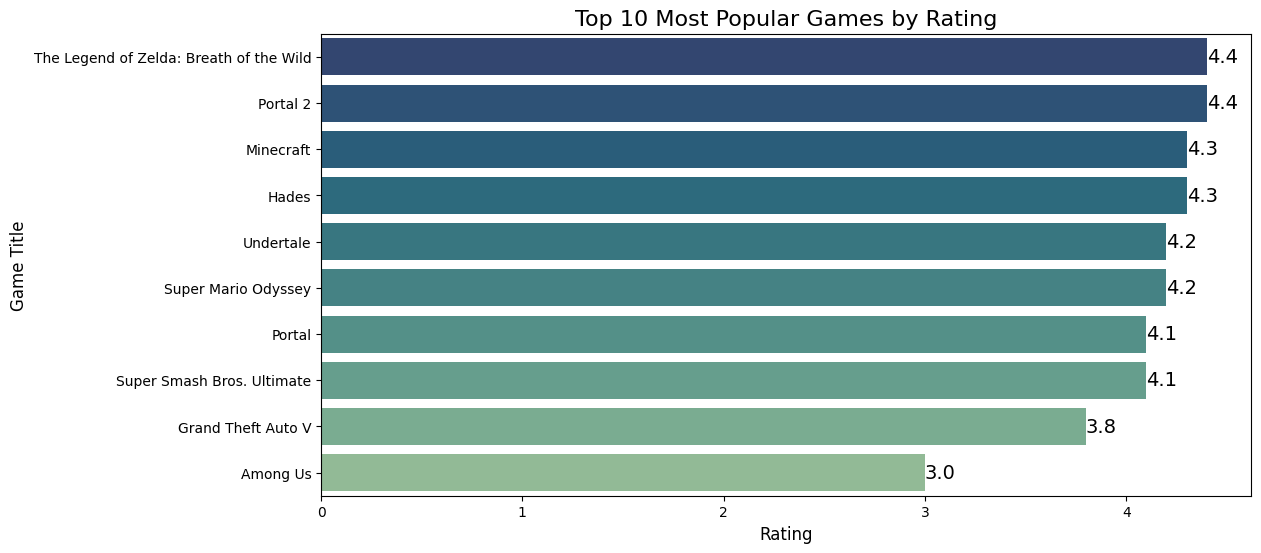

In [42]:
# Sort the data by 'Rating'
top_weighted_games_by_rating = top_weighted_games.sort_values('Rating', ascending=False)

# Create a color palette with as many colors as there are bars
palette = sns.color_palette("crest_r", len(top_weighted_games_by_rating))

# Plot with sorted data and mapped palette
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_weighted_games_by_rating, 
    x='Rating', 
    y='Title', 
    palette=palette
)

for index, value in enumerate(top_weighted_games_by_rating['Rating']):
    plt.text(value, index, str(value), fontsize=14, va='center')

plt.title('Top 10 Most Popular Games by Rating', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Game Title', fontsize=12)
plt.show()

**At result:**

* *Top Games:* "The Legend of Zelda: Breath of the Wild" and "Portal 2" are at the top with the highest ratings, suggesting their widespread acclaim and popularity among gamers.
* *Ratings Spread:* The ratings range from 3.0 to 4.4, with a notable drop from "Super Smash Bros. Ultimate" at 4.1 to "Grand Theft Auto V" at 3.8, indicating a diverse range of opinions.
* *Diverse Genres:* The list includes a variety of game genres such as action-adventure, sandbox, puzzle, and social deduction, showing that different types of games can achieve high ratings.
* *Close Competition:* Many games have very close ratings, such as "Hades" and "Minecraft" both at 4.3, and "Super Mario Odyssey" and "Undertale" both at 4.2. This highlights the competitive nature of the gaming industry.
* *Recent vs. Classic:* Some games like "Among Us" are more recent, while others like "Portal" have been around for over a decade, indicating that both new and classic games can be highly rated.

**Insights:**

* *High Ratings:* The games with the highest ratings, such as "The Legend of Zelda: Breath of the Wild" and "Portal 2," are known for their engaging gameplay, innovative mechanics, and strong storytelling. These elements are often key to a game's success.
* *Diverse Genres:* The variety of genres in the top 10 indicates that gamers appreciate a wide range of experiences. This diversity suggests that there's no single formula for a highly-rated game; quality can come in many forms.
* *Recent Trends:* The inclusion of recent games like "Among Us" shows how new trends can quickly rise to popularity. Keeping an eye on emerging trends can be crucial for staying relevant in the gaming industry.
* *Close Competition:* Many games have very close ratings, highlighting the intense competition among top-tier games. Small improvements in gameplay, graphics, or user experience can make a significant difference in a game's rating.

**Recommendations:**

1. *For Gamers:*

* *Explore Different Genres:* Don't limit yourself to one type of game. The plot shows that highly-rated games span a variety of genres, so trying something new might lead to a great experience.
* *Follow Trends:* Keep an eye on new releases and trending games. Platforms like Steam and the PlayStation Store often highlight new and popular games, which can lead to discovering new favorites.


2. *For Game Developers:*

* *Focus on Quality:* High-quality gameplay, innovative mechanics, and strong storytelling are common features of top-rated games. Prioritize these aspects during development.
* *Stay Adaptive:* Be ready to adapt to new trends and player preferences. Engaging with the gaming community and gathering feedback can provide valuable insights.
* *Invest in Variety:* Consider developing games across different genres. This can appeal to a broader audience and increase the chances of creating a highly-rated game.


3. *For Game Reviewers:*

* *Detailed Reviews:* Providing thorough and insightful reviews can help gamers make informed decisions. Highlighting unique aspects and comparing games within the same genre can be particularly helpful.
* *Engage with the Community:* Building a community around your reviews can foster discussions and provide additional perspectives, enriching your content.

#### Display bar plot top-10 popular video games by times listed.

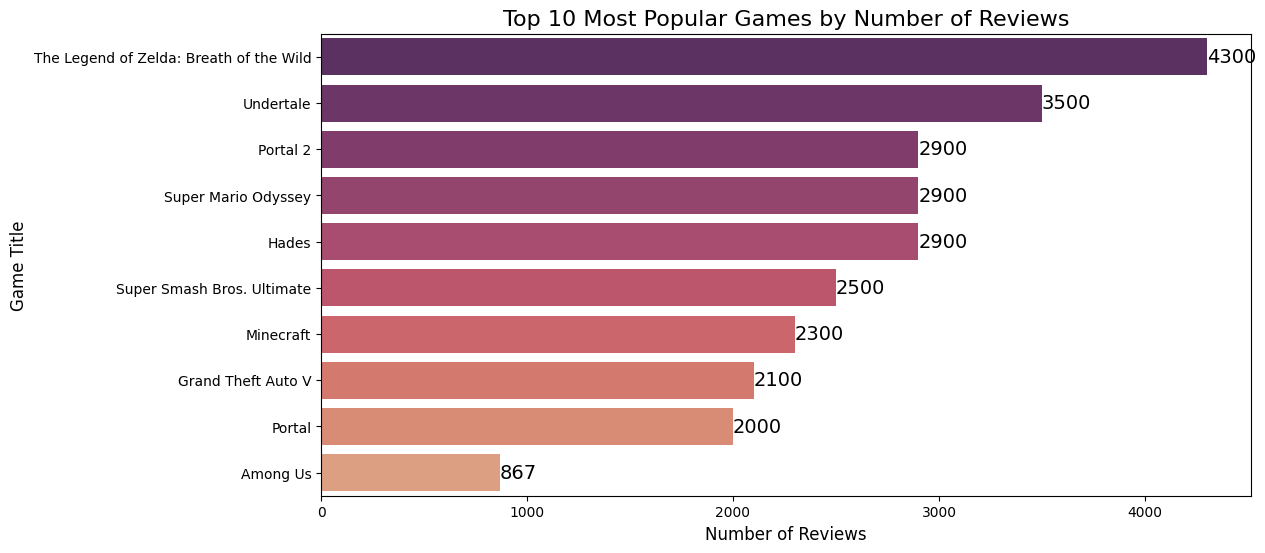

In [43]:
# Sort the data by 'Times Listed'
top_weighted_games_by_times = top_weighted_games.sort_values('Number of Reviews', ascending=False)

# Create a color palette with as many colors as there are bars
palette = sns.color_palette("flare_r", len(top_weighted_games_by_times))

# Plot with sorted data and mapped palette
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_weighted_games_by_times, 
    x='Number of Reviews', 
    y='Title', 
    palette=palette
)

for index, value in enumerate(top_weighted_games_by_times['Number of Reviews']):
    plt.text(value, index, str(value), fontsize=14, va='center')

plt.title('Top 10 Most Popular Games by Number of Reviews', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Game Title', fontsize=12)
plt.show()

**At result:**

* *Nintendo Dominance:* Games like The Legend of Zelda: Breath of the Wild, Super Mario Odyssey, and Super Smash Bros. Ultimate showcase Nintendo's continued popularity among gamers.
* *Indie Success:* Undertale and Hades are indie games, yet they have a significant presence on the list, highlighting the impact and reach of indie titles in the gaming community.
* *Multiplayer Appeal:* Games like Among Us and Super Smash Bros. Ultimate reflect the strong preference for multiplayer experiences.
* *Timeless Classics:* Minecraft and Grand Theft Auto V have been around for years but remain hugely popular, indicating their timeless appeal.
* *Portal Series Love:* Both Portal and Portal 2 are on the list, suggesting a strong affinity for puzzle-platform games among players.

**Insights:**

* *Popularity of Nintendo Games:* Nintendo titles have a strong presence, suggesting that they have a loyal fan base and continue to produce games that resonate with players of all ages.
* *Impact of Indie Games:* Indie games like Undertale and Hades have made significant impacts, indicating that players are open to exploring creative and unique game experiences outside of big studio productions.
* *Enduring Appeal:* Older games like Minecraft and Grand Theft Auto V still hold significant popularity, suggesting that these games have successfully maintained relevance over the years.
* *Multiplayer Preferences:* The inclusion of multiplayer-focused games like Among Us and Super Smash Bros. Ultimate indicates a strong interest in social and competitive gaming experiences.
* *Puzzle-Platform Preference:* The presence of both Portal and Portal 2 shows a continued appreciation for puzzle-platform games that challenge players intellectually.

**Recommendations:**

1. *For Developers:*

* Innovative Gameplay: Emulate the creative gameplay mechanics seen in popular indie games to attract a diverse audience.
* Engaging Storylines: Focus on developing rich, engaging storylines similar to those in The Legend of Zelda and Undertale to deepen player engagement.
* Multiplayer Features: Consider incorporating multiplayer elements to tap into the social gaming trend.
* Sustainability: Develop content updates and expansions to keep older games relevant and maintain player interest over time.

2. *For Gamers:*

* Explore Indies: Don’t hesitate to try indie games. They often offer unique and refreshing experiences.
* Join Communities: Participate in online multiplayer games to engage with broader gaming communities and enhance your social gaming experience.
* Revisit Classics: Revisit or explore classics like Minecraft and Grand Theft Auto V to see why they continue to be loved by many.

3. *For Marketers:*

* Targeted Promotions: Focus marketing efforts on platforms and communities that have shown strong interest in specific genres or titles.
* Highlight Unique Features: Emphasize the unique aspects and engaging storylines of games in marketing campaigns to attract more players.

#### Display bar plot top-10 popular video games by backlogs.

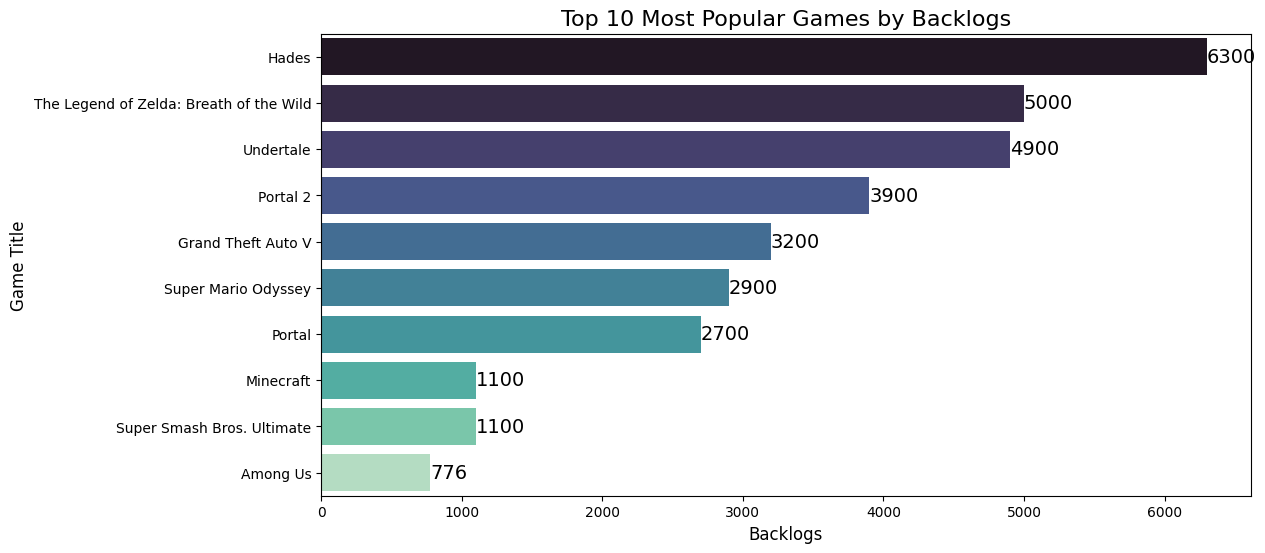

In [44]:
# Sort the data by 'Backlogs'
top_weighted_games_by_backlogs = top_weighted_games.sort_values('Backlogs', ascending=False)

# Create a color palette with as many colors as there are bars
palette = sns.color_palette("mako", len(top_weighted_games_by_backlogs))

# Plot with sorted data and mapped palette
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_weighted_games_by_backlogs, 
    x='Backlogs', 
    y='Title', 
    palette=palette
)

for index, value in enumerate(top_weighted_games_by_backlogs['Backlogs']):
    plt.text(value, index, str(value), fontsize=14, va='center')

plt.title('Top 10 Most Popular Games by Backlogs', fontsize=16)
plt.xlabel('Backlogs', fontsize=12)
plt.ylabel('Game Title', fontsize=12)
plt.show()

**At result:**

* Hades stands out significantly with the highest number of backlogs, suggesting it is highly popular but also possibly time-consuming or challenging to complete.
* The Legend of Zelda: Breath of the Wild and Undertale are also very popular, with a high number of backlogs indicating strong interest but perhaps a large or demanding game experience.
* The presence of Portal and Portal 2 shows that classic puzzle games still hold strong appeal and many players intend to play them.
* Grand Theft Auto V and Minecraft reflect their massive popularity in the gaming community, with players either drawn to their vast open-world experiences or planning to spend more time exploring their endless possibilities.
* Super Mario Odyssey and Super Smash Bros. Ultimate highlight the ongoing popularity of Nintendo's flagship titles.
* Among Us, despite being a more recent phenomenon, has managed to secure a spot in the top 10, showcasing its viral appeal and the significant backlog of players who want to join the hype.

**Insights:**

* *Game Engagement:* The high backlogs for games like Hades, The Legend of Zelda: Breath of the Wild, and Undertale indicate strong player engagement. These games may offer rich, expansive content that players find appealing and challenging.
* *Classic Titles:* The inclusion of Portal and Portal 2 suggests that classic puzzle games maintain a significant place in gamers' hearts, possibly due to their innovative gameplay and replayability.
* *Broad Appeal:* Games such as Grand Theft Auto V and Minecraft highlight their wide appeal and lasting popularity. These titles are known for their vast, open-world experiences, which can explain why many players have them in their backlogs.
* *Nintendo’s Stronghold:* The presence of Super Mario Odyssey and Super Smash Bros. Ultimate in the top 10 signifies the continued dominance of Nintendo’s flagship games in the market.
* *Viral Sensations:* Among Us making it to the list showcases the impact of viral games and their ability to attract large player bases quickly.

**Recommendations:**

1. *For Developers:*

* *Focus on Rich Content:* Developing games with expansive worlds and rich, engaging content can attract a large number of players. Games that offer long-term playability and challenges tend to have high backlog numbers, indicating sustained interest.
* *Innovate with Classics:* Consider creating games with innovative gameplay mechanics, as seen with the success of Portal and Portal 2.

2. *For Players:*

* *Plan Playtime:* For long and engaging games, planning your playtime can help you make steady progress through your backlog. Setting aside dedicated gaming sessions can make it easier to complete these titles.
* *Explore Diverse Genres:* Don’t hesitate to explore different genres. Popular backlog games span from action-adventure and role-playing to puzzle and social deduction, suggesting that exploring varied game types can offer a rewarding experience.

3. *For Marketers:*

* *Highlight Game Depth:* Marketing campaigns that emphasize the depth and richness of a game’s content can attract more players. Highlighting these aspects can show potential players what they can look forward to.
* *Leverage Nostalgia:* Promoting remakes or sequels of classic games can tap into the nostalgia factor, attracting both old fans and new players.

#### Display bar plot top-10 popular video games by wishlist.

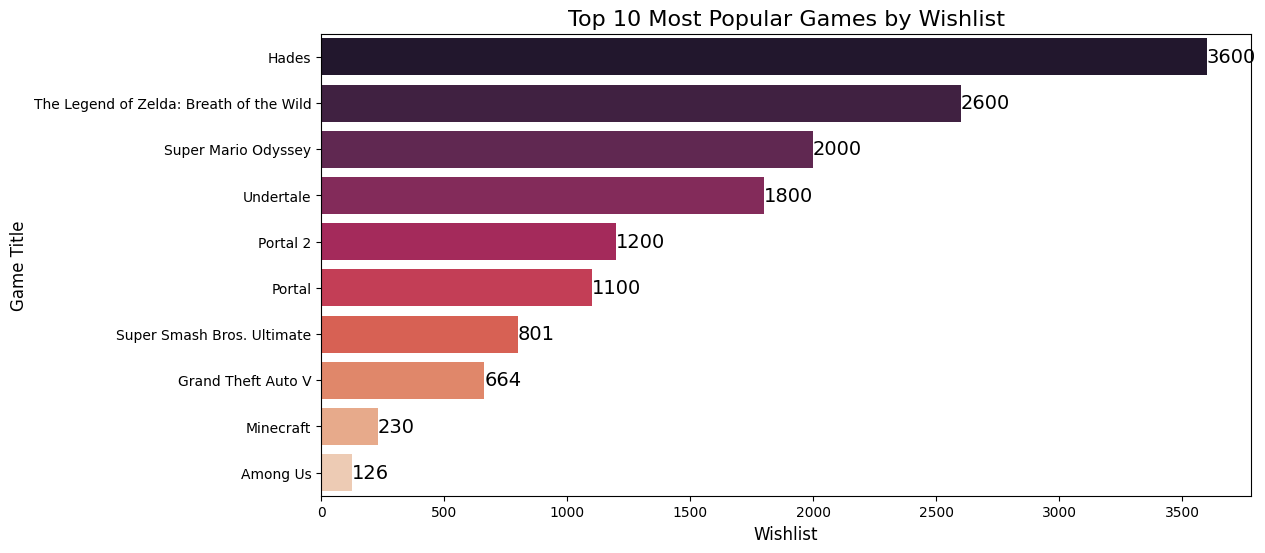

In [45]:
# Sort the data by 'Wishlist'
top_weighted_games_by_wishlist = top_weighted_games.sort_values('Wishlist', ascending=False)

# Create a color palette with as many colors as there are bars
palette = sns.color_palette("rocket", len(top_weighted_games_by_wishlist))

# Plot with sorted data and mapped palette
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_weighted_games_by_wishlist, 
    x='Wishlist', 
    y='Title', 
    palette=palette
)

for index, value in enumerate(top_weighted_games_by_wishlist['Wishlist']):
    plt.text(value, index, str(value), fontsize=14, va='center')

plt.title('Top 10 Most Popular Games by Wishlist', fontsize=16)
plt.xlabel('Wishlist', fontsize=12)
plt.ylabel('Game Title', fontsize=12)
plt.show()

**At result:**

* *"Hades" Dominates:* "Hades" has the highest number of wishlists by a significant margin, with 3600 wishlists.
* *Top Three Games:* The top three games, "Hades," "The Legend of Zelda: Breath of the Wild," and "Super Mario Odyssey," have a noticeable lead in wishlists compared to the others.
* *Popularity Gradient:* There is a clear decline in the number of wishlists as you move down the rankings from the top to the bottom.
* *Competitiveness:* The games ranked 4th to 10th have a closer range of wishlists, indicating a more competitive middle ground.
* *Visual Insights:* The lengths of the bars provide a quick visual insight into how much more popular the top games are compared to those lower on the list.

**Insights:**

* *High Demand for "Hades":* "Hades" is significantly more popular than any other game on the list, with 3600 wishlists. This indicates a high level of interest and anticipation among gamers.
* *Nostalgia and Franchises:* Games like "The Legend of Zelda: Breath of the Wild" and "Super Mario Odyssey" show that established franchises continue to maintain strong popularity.
* *Diverse Interests:* The diversity of the top 10 games suggests that players have varied interests, ranging from action and adventure to role-playing and simulation.
* *Emerging Titles:* Games that are not part of long-standing franchises but still make it to the top 10 indicate emerging interests and potential new hits.

**Recommendations:**

* *Marketing Strategies:* Game developers and marketers should focus on promoting new and upcoming titles through trailers, demos, and social media to build anticipation and increase wishlists.
* *Leverage Franchise Strengths:* Developers with popular franchises should continue to leverage their established fanbase while innovating to keep the games fresh and engaging.
* *Analyze Trends:* Keeping an eye on wishlist trends can help developers understand what types of games and features are resonating with players, guiding future development efforts.
* *Community Engagement:* Engaging with gaming communities through forums, social media, and events can help build a loyal fanbase and increase visibility for both new and established games.
* *Cross-Promotions:* Consider cross-promotions or collaborations between popular games to reach a wider audience and create unique experiences for players.

### Count the games that released of each year and then visualise with barplot

#### Count games each by release year

In [46]:
games_with_date = games.copy()

# Extract the year from the 'Release Date'
games_with_date['Release Year'] = games_with_date['Release Date'].dt.year

# Count the number of games released each year
games_per_year = games_with_date['Release Year'].value_counts().sort_index()

# Display the data
print(f"List of games by release years:\n{games_per_year}")

List of games by release years:
Release Year
1980     1
1982     1
1985     1
1986     3
1987     3
1988     3
1989     3
1990     6
1991     8
1992     6
1993     8
1994     8
1995    10
1996    12
1997    15
1998    12
1999    21
2000    13
2001    25
2002    20
2003    23
2004    28
2005    32
2006    27
2007    37
2008    38
2009    30
2010    43
2011    36
2012    45
2013    55
2014    42
2015    49
2016    59
2017    50
2018    55
2019    58
2020    52
2021    63
2022    91
2023    23
2024     1
Name: count, dtype: int64


#### Visualize bar plot by release year vs count of games

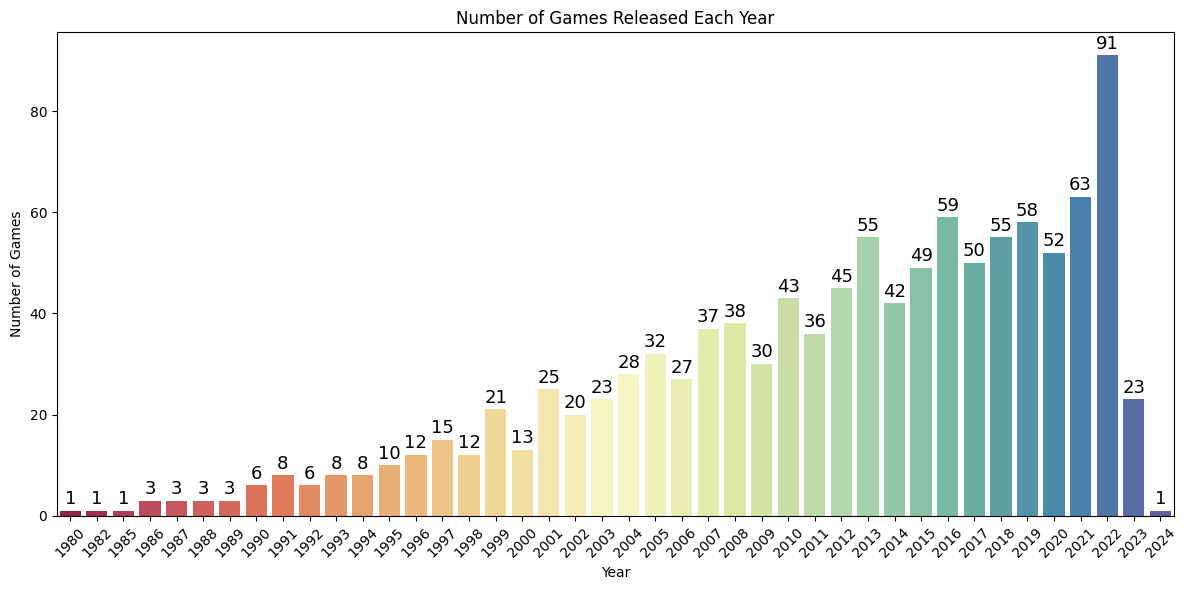

In [47]:
# Assuming games_per_year is a Pandas Series where index represents years and values represent counts.

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=games_per_year.index, y=games_per_year.values, palette='Spectral')

# Adding counts on top of each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # x position
        p.get_height() + 0.5,          # y position (slightly above the bar)
        int(p.get_height()),           # text (count)
        size = 13,                     # font size
        ha="center",                   # horizontal alignment
        va="bottom"                    # vertical alignment
    )

plt.xticks(rotation=45)
plt.title('Number of Games Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.tight_layout()
plt.show()

**Overall Trend:**

* There is a general upward trend in the number of games released each year.
* A significant increase in game releases can be seen in recent years.
* The year 2022 stands out with the highest number of game releases, totaling 91 games.

**Insights:**

* *Overall Growth:* There has been a significant increase in the number of games released over the years, especially in the last decade. This suggests a growing interest and investment in the gaming industry.
* *Peak Year:* The year 2022 had the highest number of game releases, indicating a peak in game development activities. This could be due to various factors like increased digital distribution platforms, higher demand for gaming during the pandemic, and advancements in game development technology.
* *Fluctuations:* While the general trend is upward, there are years with noticeable fluctuations. For instance, some years may have a slight dip in releases, which could be attributed to economic factors, industry shifts, or changes in consumer preferences.
* The exponential growth in the number of games released suggests a thriving and dynamic video game industry.
* The increasing accessibility of game development tools and platforms has likely contributed to the surge in game releases.
* The growing popularity of video games among consumers has also fueled the growth of the industry.

### Count and sort genres with each percent with displaying dataframe and visualize pie plot

#### Count and sort genres with percents with displaying dataframe

In [48]:
# Split and explode the 'Genres' column
exploded_genres = games.explode('Genres')

# Count occurrences of each genre
genre_counts = exploded_genres['Genres'].value_counts()

# Calculate percentages
genre_percentages = (genre_counts / genre_counts.sum()) * 100

# Combine counts and percentages into a DataFrame for display
genre_distribution = pd.DataFrame({
    'Genre': genre_counts.index,
    'Count': genre_counts.values,
    'Percentage': genre_percentages.values
})

# Display the DataFrame
genre_distribution

,Genre,Count,Percentage
0,Adventure,726,26.988848
1,RPG,367,13.643123
2,Shooter,263,9.776952
3,Platform,243,9.033457
4,Indie,205,7.620818
5,Puzzle,131,4.869888
6,Strategy,117,4.349442
7,Brawler,107,3.977695
8,Simulator,95,3.531599
9,Turn Based Strategy,71,2.639405


#### Visualisze pie plot genres vs count games (with percents)

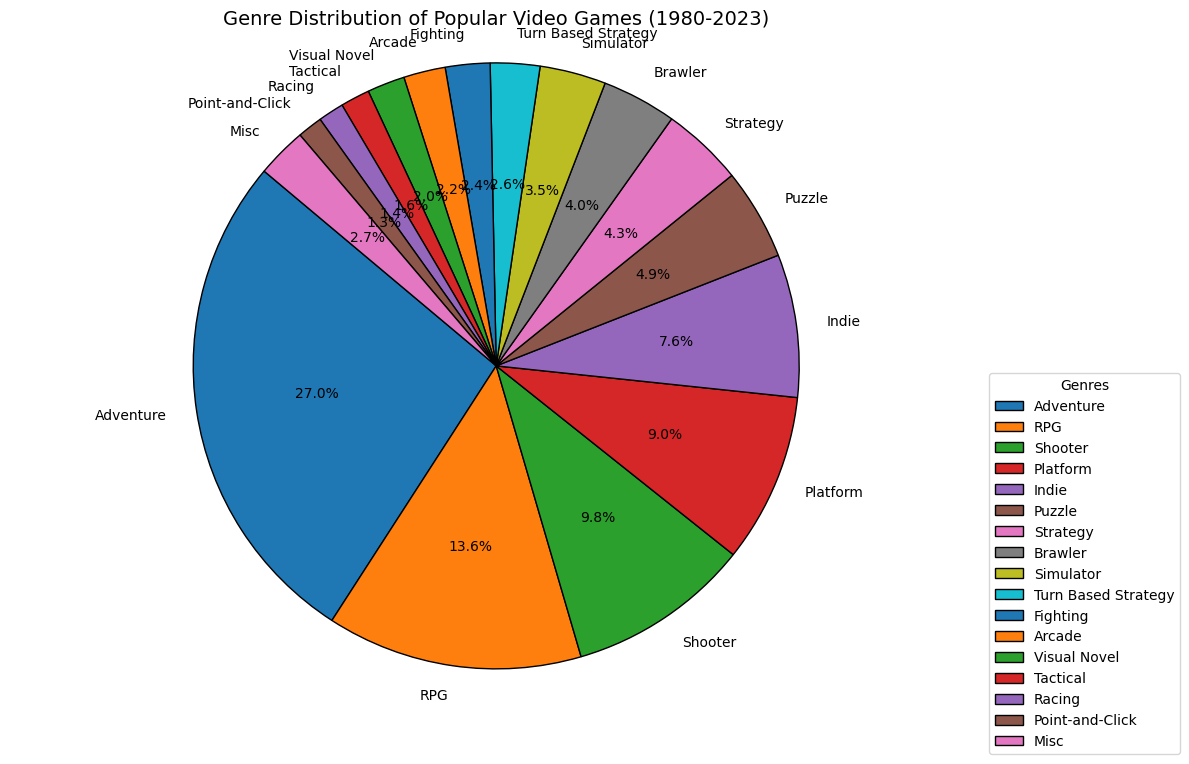

In [49]:
# Group smaller genres into 'Misc' if they are below a certain percentage threshold
threshold = 1  # Minimum percentage to have its own slice
genre_counts_filtered = genre_counts[genre_percentages >= threshold]
other_count = genre_counts[genre_percentages < threshold].sum()
genre_counts_filtered["Misc"] = other_count

# Update percentages for filtered genres
genre_percentages_filtered = (genre_counts_filtered / genre_counts_filtered.sum()) * 100

# Plot pie chart
plt.figure(figsize=(12, 8))
plt.pie(
    genre_percentages_filtered,
    labels=genre_counts_filtered.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10},
    explode=[0.1 if perc < threshold else 0 for perc in genre_percentages_filtered],
    wedgeprops={'edgecolor': 'black'}  # Add borders for clarity
)
plt.title('Genre Distribution of Popular Video Games (1980-2023)', fontsize=14)
plt.axis('equal')  # Ensures the pie chart is a perfect circle
plt.legend(loc='best', bbox_to_anchor=(1, 0.5), title="Genres", fontsize=10)
plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()

**Overall Distribution:**

* Adventure (27.0%) is the most popular genre, making up over a quarter of the games.
* RPG (Role-Playing Game, 13.6%) and Shooter (9.8%) are also quite popular, indicating a strong interest in immersive and action-packed experiences.
* Platform (9.0%), Indie (7.6%), and Puzzle (4.9%) genres show a notable presence, suggesting a diverse range of player interests.
* Strategy (4.3%), Brawler (4.0%), and Simulator (3.5%) genres highlight niche preferences among gamers.
* Other genres like Turn-Based Strategy (2.6%), Fighting (2.4%), Arcade (2.2%), Visual Novel (2.2%), Tactical (2.1%), Racing (1.6%), and Point-and-Click (1.6%) have smaller but significant shares.
* Miscellaneous (2.7%) represents genres that don't fit neatly into the other categories.

**Key Observations:**

* *Dominance of Adventure Games:* Adventure games hold the largest share, indicating a strong preference for exploratory and story-driven experiences among gamers.
* *Popularity of RPGs:* Role-Playing Games (RPGs) are also very popular, suggesting that players enjoy immersive, character-driven narratives and complex game mechanics.
* *Diverse Interests:* The variety of genres with significant shares, such as Shooters, Platformers, and Puzzles, shows that gamers have diverse tastes and enjoy a wide range of gameplay styles.
* Niche Genres:* Smaller shares for genres like Visual Novels, Tactical games, and Point-and-Click adventures indicate that while they have a dedicated following, they cater to niche markets.
* *Indie Game Presence:* The notable presence of Indie games highlights the growing importance of independent developers and the unique, innovative experiences they bring to the industry.
* *Trends Over Time:* The data likely reflects shifts in gaming trends over the years, with certain genres becoming more popular as technology and player preferences evolve.

**Insights:**

* *Adventure Games' Dominance:* The high popularity of adventure games suggests that players are particularly drawn to rich narratives and explorative gameplay.
* *RPG and Shooter Popularity:* The significant shares for RPGs and Shooters indicate that immersive storytelling and action-packed experiences are highly valued.
* *Broad Range of Interests:* The diverse spread across genres like Platform, Indie, Puzzle, and Strategy shows that gamers enjoy a variety of gameplay styles.
* *Niche Appeal:* Smaller genres like Visual Novels and Tactical games have dedicated but niche followings, indicating specific but strong interest groups.
* *Indie Games' Impact:* The notable presence of Indie games highlights the importance and success of independent developers in bringing unique experiences to the market.
* *Evolving Preferences:* The data reflects changing trends and preferences in gaming, influenced by technological advancements and evolving gamer demographics.

**Recommendations:**

* *Focus on Adventure and RPG Development:* Game developers should prioritize creating high-quality adventure and RPG games, given their strong appeal.
* *Diverse Game Offerings:* Studios should maintain a diverse portfolio, including Platform, Puzzle, and Strategy games, to cater to the wide range of player interests.
* *Support Indie Developers:* Encouraging and supporting Indie game development can lead to innovative and unique game experiences that stand out in the market.
* *Target Niche Markets:* Developers can explore niche genres like Visual Novels and Tactical games, catering to dedicated fan bases and possibly expanding them.
* *Leverage Trends and Technology:* Staying updated with gaming trends and leveraging new technologies can help developers create relevant and engaging content.
* *Player Feedback and Engagement:* Continuously gather player feedback and engage with the gaming community to understand preferences and improve game development strategies.

## Advanced Analysis

### How do user ratings correlate with factors like popularity or completion time?

#### Make correlation between numeric columns.

In [50]:
correlation = games[['Rating', 'Plays', 'Playing', 'Number of Reviews', 'Backlogs', 'Wishlist']].corr()
correlation

,Rating,Plays,Playing,Number of Reviews,Backlogs,Wishlist
Rating,1.000000,0.152041,0.237625,0.391309,0.394451,0.425068
Plays,0.152041,1.000000,0.533720,0.814361,0.601380,0.378124
Playing,0.237625,0.533720,1.000000,0.684849,0.647143,0.670491
Number of Reviews,0.391309,0.814361,0.684849,1.000000,0.833654,0.735970
Backlogs,0.394451,0.601380,0.647143,0.833654,1.000000,0.809116
Wishlist,0.425068,0.378124,0.670491,0.735970,0.809116,1.000000


#### Use heatmap to correlate Plays, Playing, Wishlist and Backlogs.

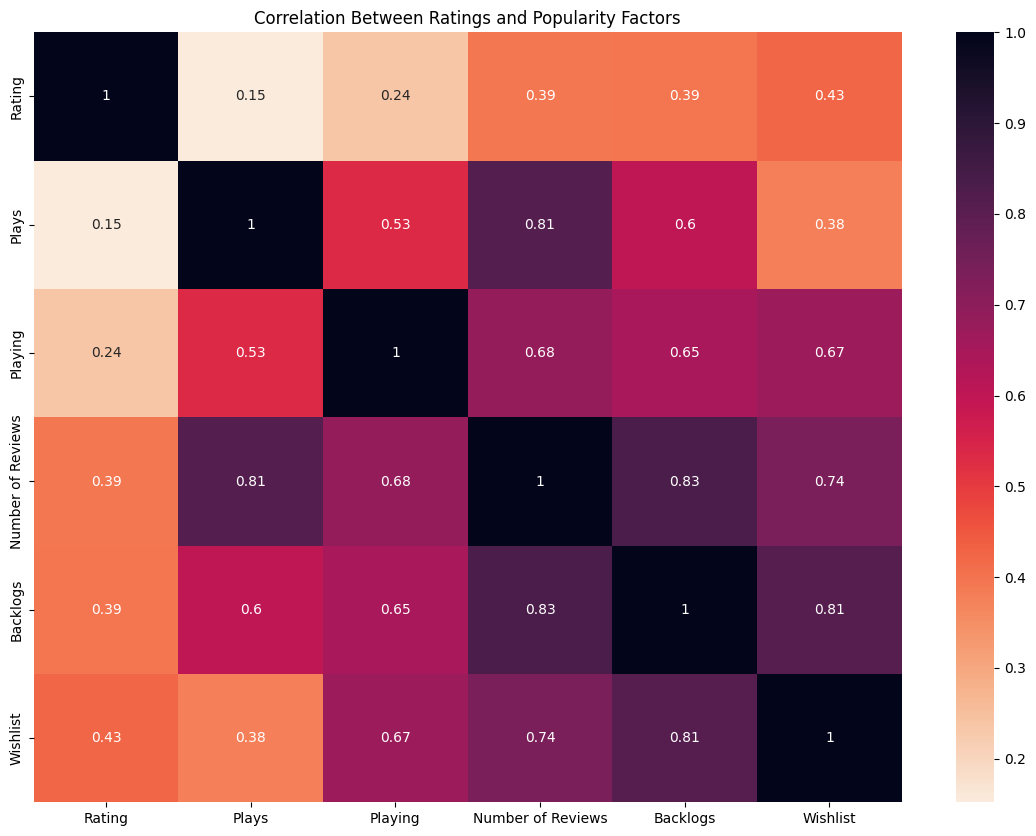

In [51]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, cmap='rocket_r')

plt.title('Correlation Between Ratings and Popularity Factors')
plt.show()

**At result:**

*Strong Correlations:*

* *"Number of Reviews" and "Plays" (0.81):* There is a strong positive correlation between these two metrics. This suggests that the more a game is played, the more reviews it tends to receive.
* *"Number of Reviews" and "Backlogs" (0.83):* People who review games also seem to add them to their backlog lists, indicating overlap between these behaviors.
* *"Backlogs" and "Wishlist" (0.81):* A strong correlation here might indicate that games in backlogs are often games users wish to play eventually.

*Moderate Correlations:*

* *"Playing" and "Number of Reviews" (0.68):* This shows that games actively being played tend to gather a moderate number of reviews.
* *"Wishlist" and "Playing" (0.67):* Users who wishlist games are likely to play them, suggesting wishlisting leads to engagement.
* *"Rating" and "Wishlist" (0.43):* Higher-rated games are slightly more likely to be on wishlists, but the correlation is moderate.

*Weak Correlations:*

* *"Rating" and "Plays" (0.15):* Surprisingly, the correlation between a game's rating and how much it's played is weak, indicating that play count isn't strongly influenced by ratings.
* *"Rating" and "Playing" (0.24):* Ratings only slightly influence how much a game is actively played.

**Insights:**

* *Popularity Metrics are Highly Interconnected:* Metrics like "Number of Reviews," "Backlogs," and "Wishlist" are strongly correlated. This indicates that games gaining traction in one of these areas are likely to perform well in the others. For example:
    * A game with more reviews tends to appear in users' backlogs and wishlists.
    * Popular games (in terms of "Plays") are highly reviewed and likely added to backlogs.
* *Ratings Have a Limited Influence:* Ratings have weak correlations with "Plays" (0.15) and "Playing" (0.24), suggesting that ratings alone do not drive user engagement. People are more influenced by other factors (like hype or marketing) when deciding what to play.
* *Wishlisting as a Lead Indicator of Engagement:* A moderate correlation between "Wishlist" and "Playing" (0.67) suggests that games on wishlists often convert to active play. This makes wishlisting an early sign of user interest.
* *Reviews and Backlogs as Key Popularity Drivers:* The strong correlation between "Number of Reviews" and "Backlogs" (0.83) indicates that reviewing behavior overlaps with backlog creation. Games with many reviews are also perceived as worth playing later.
* *Plays and Reviews are Closely Linked:* A high correlation (0.81) between "Plays" and "Number of Reviews" confirms that users who play games actively provide feedback via reviews. Reviews can be considered a reflection of active engagement.

**Recommendations:**

*Focus on Increasing Reviews to Drive Popularity:*
* Encourage users to leave reviews through incentives (e.g., in-game rewards or discounts). Reviews not only reflect popularity but also improve visibility in the community and recommendation systems.

*Leverage Wishlisting as a Marketing Tool:*
* Target users who add games to their wishlists with tailored promotions (e.g., discounts or early access).
* Highlight wishlisting features prominently on your platform to encourage user interest.

*Optimize Backlog Management:*
* Create personalized reminders for users to revisit games in their backlogs. This could increase plays and engagement for underutilized titles.

*Ratings are Secondary for Marketing:*
* Since ratings show a weak connection to plays and engagement, focus marketing campaigns on gameplay highlights, user reviews, and social proof rather than ratings alone.
* However, ensure the game quality remains high, as ratings may influence long-term perception.

*Identify and Promote Key Popular Games:*
* Use the strong correlations between "Plays," "Number of Reviews," and "Backlogs" to identify games with high potential. Promote these games across platforms to amplify their popularity.

*Convert Plays into Engagement:*
* Games with high play counts should be analyzed for deeper engagement opportunities:
    * Introduce social sharing features to encourage reviews.
    * Add in-game incentives to push users toward rating and wishlisting behaviors.

*Monitor Trends with Wishlists:*
* Regularly analyze the wishlist metric to predict future trends. A growing wishlist could signal an upcoming spike in plays and engagement.

### Are there any significant differences in user ratings for games released on different genres per year?

#### Explode genres of game to each row and then display title, release date and genres

In [52]:
# Explode the 'Genres' column to create separate rows for each genre
games_exploded = games.explode('Genres')

# Display games_exploded with columns 'Title', 'Release Date' and 'Genres'
games_exploded[['Title', 'Release Date', 'Genres']]

,Title,Release Date,Genres
Game ID,,,
1,Elden Ring,2022-02-25,Adventure
1,Elden Ring,2022-02-25,RPG
2,Hades,2019-12-10,Adventure
2,Hades,2019-12-10,Brawler
2,Hades,2019-12-10,Indie
...,...,...,...
1511,Baldur's Gate 3,2020-10-06,Strategy
1511,Baldur's Gate 3,2020-10-06,Tactical
1511,Baldur's Gate 3,2020-10-06,Turn Based Strategy


#### Use scatterplot to display release year vs rating (+ size circle) by genre that divided by colors 

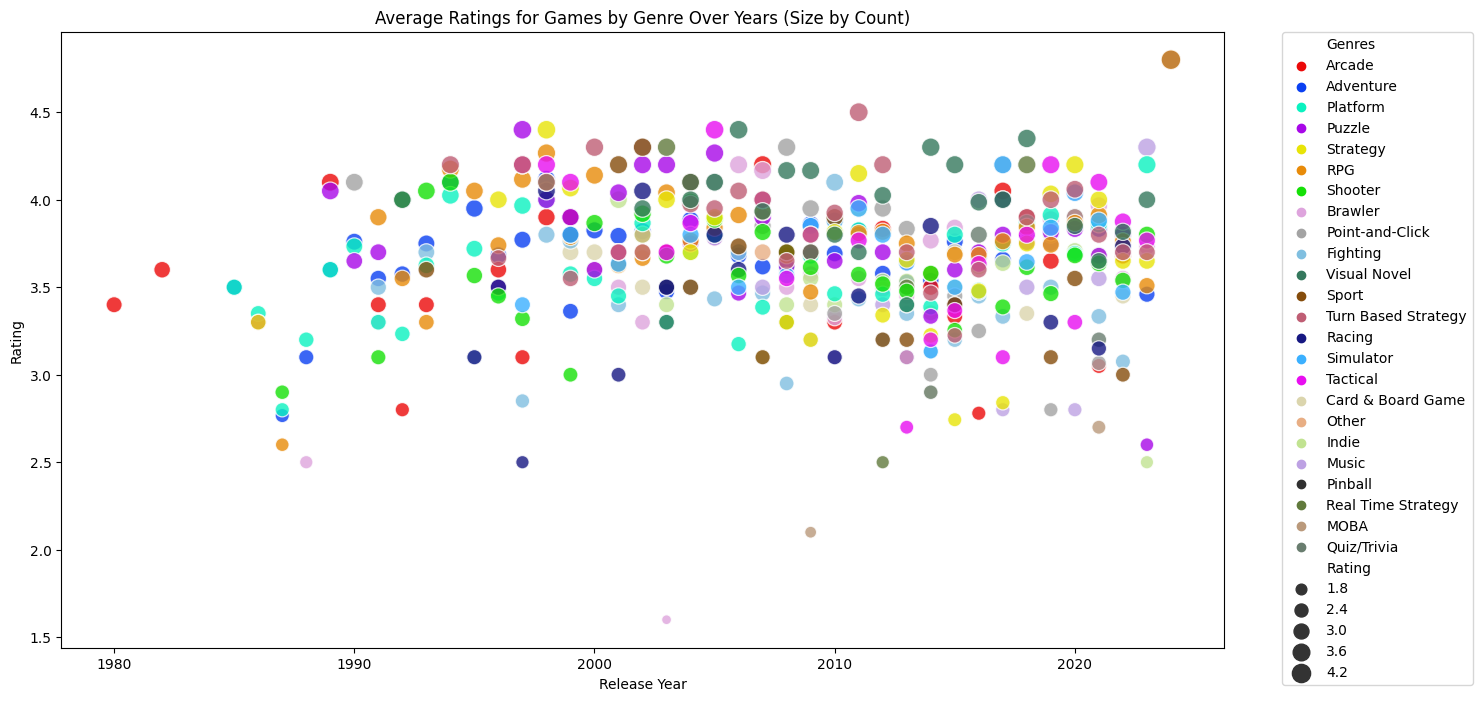

In [53]:
# Convert 'Release Date' to datetime format and extract the year
games_exploded['Release Year'] = pd.to_datetime(games_exploded['Release Date']).dt.year

# Calculate average rating by genre and year
genre_ratings = games_exploded.groupby(['Release Year', 'Genres'])['Rating'].mean().reset_index()

# Adding custom pallete colors per genre
custom_palette = [
    "#eb0909", "#0a40f2", "#0af2c0", "#a807e8", "#e8e407", "#e88b09", "#15e007", "#dea4dd",
    "#a3a3a3", "#80bfe0", "#35785d", "#854c0b", "#bf5e74", "#161882", "#3bb0ff", "#e80ef0",
    "#dbd5ad", "#e8ae84", "#c1e391", "#bda1e3", "#303030", "#617a3c", "#ba997b", "#697d6f"
]

# Create the scatter plot
plt.figure(figsize=(15, 8))
sns.scatterplot(
    data=genre_ratings,
    x='Release Year',
    y='Rating',
    hue='Genres',
    palette=custom_palette,
    size='Rating',  # Use 'Rating' column to determine marker size based on count
    sizes=(50, 200),  # Adjust marker size range as needed
    alpha=0.8  # Set marker transparency for better overlapping visualization
)

# Move legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title('Average Ratings for Games by Genre Over Years (Size by Count)')
plt.show()

**At result**:

*Genre Popularity Trends:*
* Over the years, the diversity of game genres has increased, as evident from the range of colors (genres) spread out in later years.
* Certain genres, such as RPGs and Shooters, appear more consistently across time, indicating their sustained popularity.

*Rating Trends:*
* The ratings (y-axis) for most games tend to cluster between 3.0 and 4.5, indicating that most games generally receive moderate to high ratings.
* There are fewer games with very low ratings (below 2.5), suggesting that poorly rated games are less common or less remembered.

*Volume of Releases (Dot Size):*
* Larger dots appear in more recent years, particularly after the 2000s, which suggests a higher volume of game releases for certain genres.
* This may reflect the expansion of the gaming industry and the emergence of genres like Indie, MOBA, and Simulation games.

*Early Trends (Pre-1990):*
* In the earlier years (pre-1990), the number of genres and games released was limited, as seen by fewer dots and less color variety.
* Arcade and Platform games seem to dominate this period, reflecting the early days of gaming.

*Genre-Specific Insights:*
* Arcade games appear to have had lower average ratings in the early years but are less prevalent in more recent times.
* Genres like RPGs, Strategy, and Visual Novels often achieve higher ratings, indicating consistent quality and reception.
* Some niche genres, like Quiz/Trivia and Pinball, have sporadic appearances, with varying ratings.

*Consistency in Ratings:*
* Certain genres (e.g., RPGs, Strategy, Shooter) maintain consistently high ratings across decades.
* Experimental or niche genres like Music, Fighting, and Point-and-Click show more fluctuation in ratings.

*Post-2000 Explosion:*
* After 2000, there is a significant increase in the number of games released, as seen by the dense clustering of dots.
* This period also sees a broader variety of genres, reflecting the gaming industry's rapid growth and diversification.

**Insights:**

*Popularity of Diverse Genres:*
* The gaming industry has diversified significantly since the 2000s, with genres like RPGs, Strategy, and Shooters remaining consistently popular.
* Emerging genres such as Indie, Simulation, and MOBA have gained significant attention in recent years.

*High Ratings Correlate with Specific Genres:*
* Genres like RPG, Strategy, and Visual Novels often achieve higher average ratings. Developers aiming for critical acclaim may focus on these genres.

*Rise in Game Production Post-2000:*
* The volume of game releases increased sharply after 2000, indicating a more competitive market. This could be linked to technological advances and the rise of indie game development.

*Consistent Quality Matters:*
* High-rated genres maintain their popularity over time, suggesting that consistent quality in design and storytelling is crucial for longevity.

*Low Ratings for Some Genres:*
* Certain genres, like Quiz/Trivia and Pinball, often receive lower ratings and may appeal to niche audiences. Developers should carefully assess market demand before investing in these genres.

**Recommendations:**

* *Focus on Proven Genres:* Developers aiming for commercial success should prioritize high-rated genres such as RPGs, Strategy, and Shooter games.
* *Leverage Genre Trends:* Tap into emerging genres like Indie and MOBA, which have seen significant growth in recent years. Innovation in these categories could capture the growing audience.
* *Improve Niche Genres:* For genres with lower ratings, such as Quiz/Trivia and Pinball, focus on enhancing user experience through better storytelling, graphics, or gameplay mechanics to attract broader audiences.
* *Target Specific Eras:* Analyze periods where certain genres peaked in popularity (e.g., Arcade games pre-2000) to create remakes or sequels that capitalize on nostalgia.
* *Competitive Market Strategy:* Given the increase in game production post-2000, studios need to differentiate their games through innovative gameplay, strong marketing, and targeting underserved audiences.
* *Consistency in Quality:* Ensure high-quality production standards, as consistently well-rated games tend to perform better over time and build long-term franchises.
* *Data-Driven Decisions:* Use insights from historical trends to predict future demand. For instance, newer genres like Simulation or Indie games might continue to grow with technological advancements like VR/AR.



### How does the sentiment of user reviews during reviews of the games?

#### Check that reviews column is texts in not arrays, and then sort first 10 rows.

In [54]:
# Flatten the nested lists of reviews (if they are in list format)
games_sent = games.copy()

games_sent['Reviews'] = games_sent['Reviews'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

games_sent[['Title', 'Release Date', 'Reviews']].head(10)

,Title,Release Date,Reviews
Game ID,,,
1,Elden Ring,2022-02-25,The first playthrough of elden ring is one of ...
2,Hades,2019-12-10,convinced this is a roguelike for people who d...
3,The Legend of Zelda: Breath of the Wild,2017-03-03,This game is the game (that is not CS:GO) that...
4,Undertale,2015-09-15,soundtrack is tied for #1 with nier automata. ...
5,Hollow Knight,2017-02-24,"this games worldbuilding is incredible, with i..."
6,Minecraft,2011-11-18,Minecraft is what you make of it. Unfortunatel...
7,Omori,2020-12-25,The best game I've played in my life omori is ...
8,Metroid Dread,2021-10-07,Have only been a Metroid fan for couple of yea...
9,Among Us,2018-06-15,it's a solid party game. i'm bad at lying thou...


#### Analyze and classify sentiment (Positive, Negative, Neutral) with using TextBlob and then display 20 first rows.

In [55]:
# Define a function to compute sentiment
def analyze_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity  # Polarity ranges from -1 (negative) to 1 (positive)

# Apply the function to the 'Reviews' column
games_sent['Sentiment'] = games_sent['Reviews'].apply(analyze_sentiment)

# Classify sentiment as Positive, Neutral, or Negative
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

games_sent['Sentiment_Label'] = games_sent['Sentiment'].apply(classify_sentiment)

# Display results
games_sent[['Title',  'Release Date', 'Number of Reviews', 'Reviews', 'Sentiment', 'Sentiment_Label']].head(20)

,Title,Release Date,Number of Reviews,Reviews,Sentiment,Sentiment_Label
Game ID,,,,,,
1,Elden Ring,2022-02-25,3900,The first playthrough of elden ring is one of ...,0.239687,Positive
2,Hades,2019-12-10,2900,convinced this is a roguelike for people who d...,0.118019,Positive
3,The Legend of Zelda: Breath of the Wild,2017-03-03,4300,This game is the game (that is not CS:GO) that...,0.081884,Positive
4,Undertale,2015-09-15,3500,soundtrack is tied for #1 with nier automata. ...,0.181019,Positive
5,Hollow Knight,2017-02-24,3000,"this games worldbuilding is incredible, with i...",0.120081,Positive
6,Minecraft,2011-11-18,2300,Minecraft is what you make of it. Unfortunatel...,0.162932,Positive
7,Omori,2020-12-25,1600,The best game I've played in my life omori is ...,0.041188,Positive
8,Metroid Dread,2021-10-07,2100,Have only been a Metroid fan for couple of yea...,0.062000,Positive
9,Among Us,2018-06-15,867,it's a solid party game. i'm bad at lying thou...,-0.227778,Negative


#### Analyze and classify advanced sentiment (Positive, Negative, Neutral) with using VADER and then display 20 first rows.

In [56]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Define a function to analyze sentiment using VADER
def analyze_sentiment_vader(review):
    score = sia.polarity_scores(review)
    return score['compound']  # Compound score: overall sentiment

# Apply the function to the 'Reviews' column
games_sent['Sentiment_VADER'] = games_sent['Reviews'].apply(analyze_sentiment_vader)

# Classify sentiment using thresholds
games_sent['Sentiment_Label_VADER'] = games_sent['Sentiment_VADER'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

# Display results
games_sent[['Title', 'Release Date', 'Number of Reviews', 'Reviews', 'Sentiment_VADER', 'Sentiment_Label_VADER']].head(20)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Title,Release Date,Number of Reviews,Reviews,Sentiment_VADER,Sentiment_Label_VADER
Game ID,,,,,,
1,Elden Ring,2022-02-25,3900,The first playthrough of elden ring is one of ...,0.9980,Positive
2,Hades,2019-12-10,2900,convinced this is a roguelike for people who d...,0.9962,Positive
3,The Legend of Zelda: Breath of the Wild,2017-03-03,4300,This game is the game (that is not CS:GO) that...,0.9408,Positive
4,Undertale,2015-09-15,3500,soundtrack is tied for #1 with nier automata. ...,0.9848,Positive
5,Hollow Knight,2017-02-24,3000,"this games worldbuilding is incredible, with i...",0.9939,Positive
6,Minecraft,2011-11-18,2300,Minecraft is what you make of it. Unfortunatel...,0.8559,Positive
7,Omori,2020-12-25,1600,The best game I've played in my life omori is ...,0.9864,Positive
8,Metroid Dread,2021-10-07,2100,Have only been a Metroid fan for couple of yea...,0.9754,Positive
9,Among Us,2018-06-15,867,it's a solid party game. i'm bad at lying thou...,-0.1088,Negative


#### Visualise two bar plots (TextBlob and VADER both) with sentiments (Positive, Negative, Neutral)

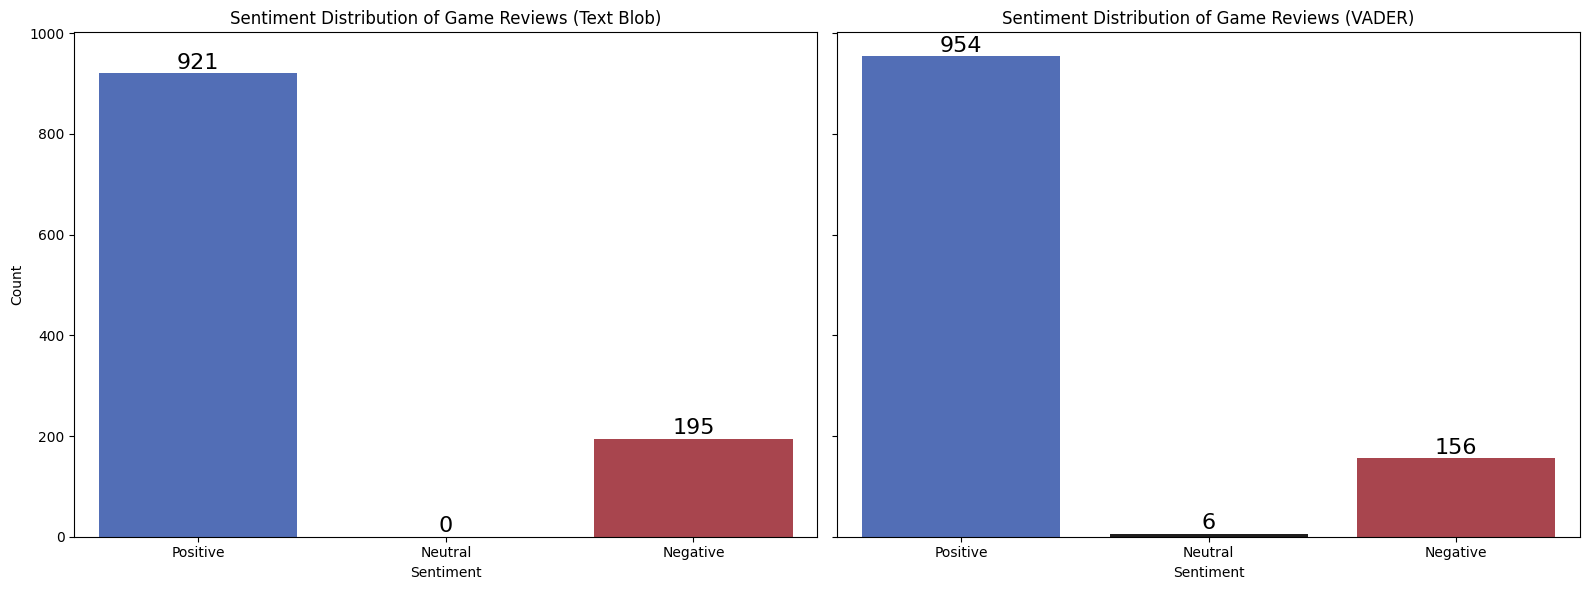

In [57]:
# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot sentiment distribution (Text Blob) on the first axis
ex_a = sns.countplot(
    data=games_sent, 
    x='Sentiment_Label', 
    order=['Positive', 'Neutral', 'Negative'], 
    palette='icefire', 
    ax=axes[0]
)

# Adding counts on top of each bar for Text Blob
for p in ex_a.patches:
    ex_a.text(
        p.get_x() + p.get_width() / 2,  # x position
        p.get_height() + 0.5,          # y position (slightly above the bar)
        int(p.get_height()),           # text (count)
        size=16,                       # font size
        ha="center",                   # horizontal alignment
        va="bottom"                    # vertical alignment
    )

axes[0].set_title('Sentiment Distribution of Game Reviews (Text Blob)')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

# Plot sentiment distribution (VADER) on the second axis
ex_b = sns.countplot(
    data=games_sent, 
    x='Sentiment_Label_VADER', 
    order=['Positive', 'Neutral', 'Negative'], 
    palette='icefire', 
    ax=axes[1]
)

# Adding counts on top of each bar for VADER
for p in ex_b.patches:
    ex_b.text(
        p.get_x() + p.get_width() / 2,  # x position
        p.get_height() + 0.5,          # y position (slightly above the bar)
        int(p.get_height()),           # text (count)
        size=16,                       # font size
        ha="center",                   # horizontal alignment
        va="bottom"                    # vertical alignment
    )

axes[1].set_title('Sentiment Distribution of Game Reviews (VADER)')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('')  # Avoid duplicate ylabel on the second plot

# Adjust spacing between plots
plt.tight_layout()

# Show the combined plots
plt.show()

**At result:**

* *Positive Sentiment Dominates:* Both TextBlob and VADER classify the majority of the reviews as positive (921 for TextBlob, 954 for VADER). This indicates that most users express favorable opinions about the games.
* *Minimal Neutral Sentiment:* TextBlob does not classify any reviews as neutral, while VADER identifies only 6 neutral reviews. This shows that most reviews are either strongly positive or strongly negative, with very few exhibiting neutral opinions.
* *Negative Sentiment Varies:* TextBlob identifies 195 reviews as negative, while VADER identifies fewer, at 156. This suggests that TextBlob might be slightly stricter in identifying negativity, or VADER might account for mixed sentiments differently.

**Insights:**

* *Strongly Positive Sentiment Across Reviews:*  Both TextBlob and VADER agree that the majority of game reviews are positive, suggesting that the games being analyzed are well-received by the audience.
* *Negligible Neutral Sentiment:* VADER identifies only 6 neutral reviews, while TextBlob does not classify any reviews as neutral. This indicates that most users express clear opinions, either positive or negative, rather than neutral.
* *Slight Variance in Negative Sentiment Detection:* TextBlob identifies more negative reviews (195) compared to VADER (156). This could indicate that TextBlob tends to classify slightly critical reviews as negative, while VADER balances sentiment based on intensity.
* *Tool-Specific Differences:* The small discrepancies between TextBlob and VADER highlight the importance of understanding the strengths and limitations of each sentiment analysis method:
    * TextBlob may be more suitable for binary classifications (positive/negative).
    * VADER may be better for nuanced sentiment detection due to its ability to identify neutral reviews and account for sentiment intensity.

**Recommendations:**

* *Use Multiple Sentiment Analysis Tools:* Employ both TextBlob and VADER (or other tools) for sentiment analysis, as their differences can provide complementary insights, especially when working with ambiguous or mixed reviews.
* *Investigate Neutral Reviews:* Since VADER detects a small number of neutral reviews, further analyze these cases to understand whether they truly represent neutral sentiment or contain mixed or weakly expressed opinions.
* *Refine Negative Sentiment Detection:* Compare negative reviews identified by both methods to determine if TextBlob is overestimating negativity or if VADER is underestimating it. This can improve the interpretation of critical reviews.
* *Validate Sentiment Results:* Perform manual validation of a sample of reviews to ensure the sentiment classifications align with human judgment. This will help identify any systematic biases in the tools.
* *Adapt Analysis Based on Goals:* If the objective is to classify reviews as strictly positive or negative, TextBlob might suffice. If nuanced sentiment detection is required (e.g., distinguishing between mixed reviews), VADER or similar tools may be more appropriate.
* *Incorporate Contextual Analysis:* Sentiment analysis tools work better when paired with domain-specific insights. Consider combining these results with other features, such as review length or specific keywords, to enhance the understanding of user feedback.

## Conslusion

In conclusion, this EDA project provided valuable insights into the trends and user preferences within the gaming industry based on the "Popular Video Games 1980 - 2023 🎮" dataset. We observed that adventure games hold the largest share, indicating a strong preference for exploratory and story-driven experiences among gamers. RPGs are also very popular, suggesting that players enjoy immersive, character-driven narratives and complex game mechanics. The analysis of correlations between various metrics like ratings, reviews, wishlists, and backlogs revealed interesting connections. It is noteworthy that popularity metrics are highly interconnected, and a game gaining traction in one area is likely to perform well in the others. The sentiment analysis indicated that the majority of game reviews are positive, suggesting that the games are generally well-received by the audience.

Overall, this EDA project has shed light on user preferences and trends in the gaming industry. These insights can be valuable for game developers, publishers, and marketers in creating, promoting, and distributing games that cater to the evolving needs and interests of gamers.